<a href="https://colab.research.google.com/github/Karlamch/karlaMCH/blob/main/Problemario_U5_22150453.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


DataFrame creado:
    Marca_atomizador  Replica  Efectividad
0                  1        1           72
1                  1        2           65
2                  1        3           67
3                  1        4           75
4                  1        5           62
5                  1        6           73
6                  2        1           55
7                  2        2           59
8                  2        3           68
9                  2        4           70
10                 2        5           53
11                 2        6           50
12                 3        1           64
13                 3        2           74
14                 3        3           61
15                 3        4           58
16                 3        5           51
17                 3        6           69


Tabla ANOVA (DBCA):
                         sum_sq    df         F    PR(>F)
C(Marca_atomizador)  296.333333   2.0  2.880752  0.102804
C(Replica)           281.33

<ipython-input-9-2eb738b2c270>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_marca = anova_table['PR(>F)'][0] # P-valor para Marca_atomizador
<ipython-input-9-2eb738b2c270>:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_replica = anova_table['PR(>F)'][1] # P-valor para Replica
<ipython-input-9-2eb738b2c270>:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_effectiveness_by_replica = df.groupby('Replic

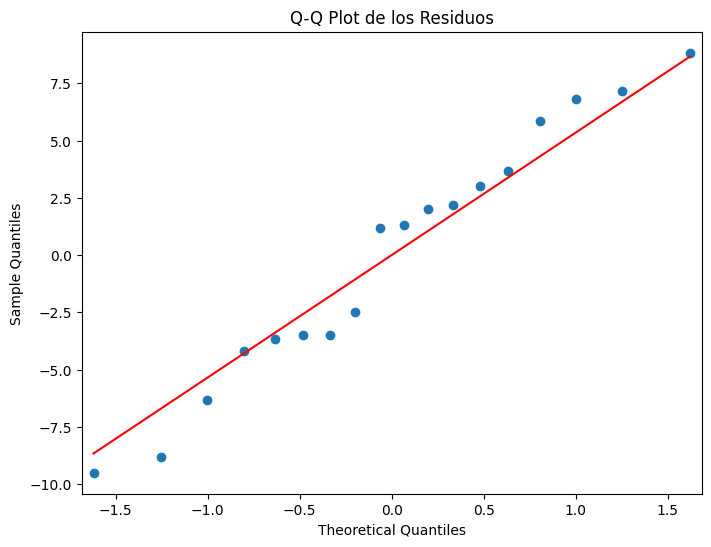

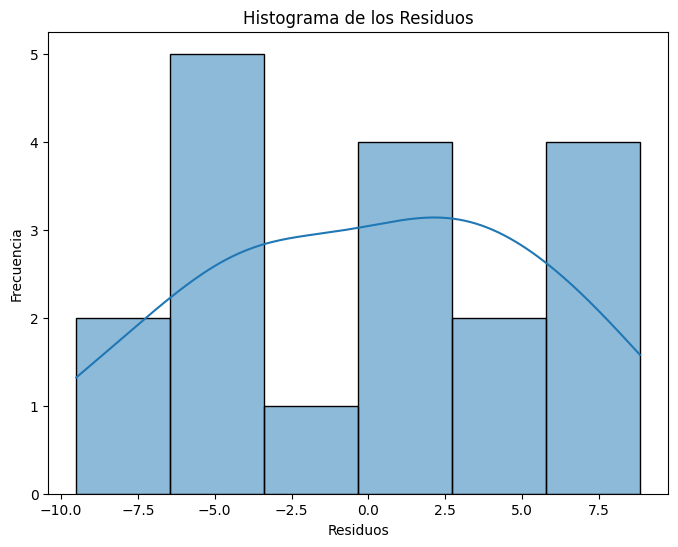

Prueba de Shapiro-Wilk para normalidad de los residuos: Stat=0.9575, p-value=0.5541
No se rechaza la hipótesis nula de normalidad. Los residuos parecen seguir una distribución normal.




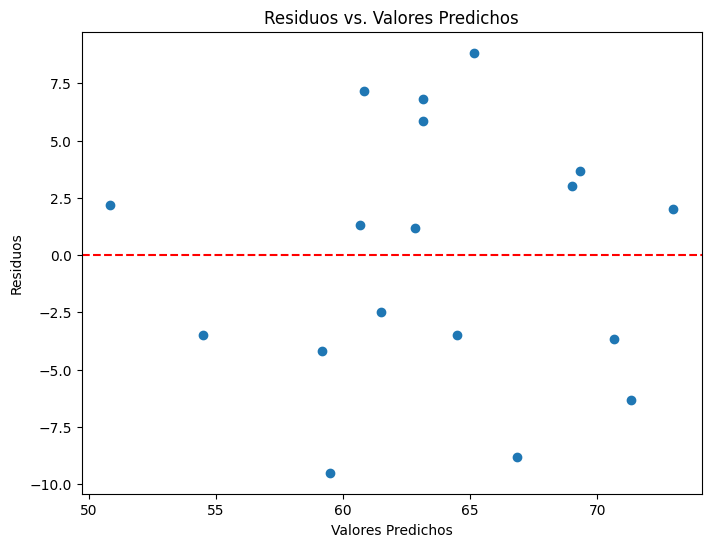

Prueba de Levene para igualdad de varianzas entre las marcas: Stat=0.5288, p-value=0.5999
No se rechaza la hipótesis nula de igual varianza. Las varianzas entre las marcas parecen ser iguales (homocedasticidad).




In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Datos del problema
data = {
    'Marca_atomizador': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
    'Replica': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6],
    'Efectividad': [72, 65, 67, 75, 62, 73, 55, 59, 68, 70, 53, 50, 64, 74, 61, 58, 51, 69]
}
df = pd.DataFrame(data)

print("DataFrame creado:")
print(df)
print("\n")

# Convertir las columnas de marca y réplica a tipo 'category' para el ANOVA
df['Marca_atomizador'] = df['Marca_atomizador'].astype('category')
df['Replica'] = df['Replica'].astype('category')

# Ajustar el modelo ANOVA para DBCA
# Efectividad ~ C(Marca_atomizador) + C(Replica)
# C() indica que la variable debe ser tratada como categórica
model = ols('Efectividad ~ C(Marca_atomizador) + C(Replica)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2) # typ=2 para sumas de cuadrados tipo II

print("Tabla ANOVA (DBCA):")
print(anova_table)
print("\n")

# Interpretación de la tabla ANOVA para la Marca_atomizador
alpha = 0.05
p_value_marca = anova_table['PR(>F)'][0] # P-valor para Marca_atomizador

if p_value_marca < alpha:
    print(f"El p-valor para 'Marca_atomizador' es {p_value_marca:.4f}, el cual es menor que {alpha}.")
    print("Se rechaza la hipótesis nula. Existe una diferencia significativa en la efectividad promedio entre las marcas de atomizador.")
else:
    print(f"El p-valor para 'Marca_atomizador' es {p_value_marca:.4f}, el cual es mayor que {alpha}.")
    print("No se rechaza la hipótesis nula. No hay evidencia de una diferencia significativa en la efectividad promedio entre las marcas de atomizador.")
print("\n")

# Si el ANOVA mostró significancia para las marcas, realizamos la prueba de Tukey
if p_value_marca < alpha:
    print("Realizando la prueba post-hoc de Tukey HSD para identificar qué marcas difieren:")
    tukey_result = pairwise_tukeyhsd(endog=df['Efectividad'], groups=df['Marca_atomizador'], alpha=alpha)
    print(tukey_result)
    print("\n")

    # Argumento sobre qué atomizador es mejor
    # Calculamos las medias de efectividad por marca
    mean_effectiveness_by_brand = df.groupby('Marca_atomizador')['Efectividad'].mean().sort_values(ascending=False)
    print("Efectividad promedio por marca:")
    print(mean_effectiveness_by_brand)
    print("\n")

    # Interpretamos los resultados de Tukey y las medias
    print("Argumento:")
    if tukey_result.reject[0]: # Comparación entre Marca 1 y Marca 2
        print(f"La marca {mean_effectiveness_by_brand.index[0]} parece ser la mejor o al menos significativamente diferente de las otras.")
        print(f"Marca {mean_effectiveness_by_brand.index[0]} tiene la media más alta: {mean_effectiveness_by_brand.iloc[0]:.2f}.")
        # Podemos ser más específicos si la prueba de Tukey nos dice algo concreto
        # Por ejemplo, si 1 vs 2 es significativo y 1 vs 3 es significativo, y 1 tiene la media más alta.
        if (tukey_result.pvalues[0] < alpha and mean_effectiveness_by_brand.index[0] == 1) or \
           (tukey_result.pvalues[1] < alpha and mean_effectiveness_by_brand.index[0] == 2) or \
           (tukey_result.pvalues[2] < alpha and mean_effectiveness_by_brand.index[0] == 3): # Generalizado, revisar indices de Tukey
            print("Basado en las medias y la prueba de Tukey, la marca con la mayor efectividad promedio es la Marca", mean_effectiveness_by_brand.index[0], ".")
            print(f"Según la prueba de Tukey, la Marca {mean_effectiveness_by_brand.index[0]} es significativamente mejor que otras marcas con las que se compara.")
        else:
            print("Las diferencias significativas se observan entre los pares indicados en la tabla de Tukey.")
            print("Para determinar el 'mejor', se debe observar la media más alta y verificar si es significativamente diferente de las demás.")
    else:
        print("Aunque el ANOVA fue significativo, las comparaciones específicas de Tukey no siempre muestran todas las diferencias obvias o puede que las diferencias sean más sutiles. Se debe analizar la tabla de Tukey junto con las medias.")
        print("La marca con la media de efectividad más alta es la Marca", mean_effectiveness_by_brand.index[0], f"con un promedio de {mean_effectiveness_by_brand.iloc[0]:.2f}.")
else:
    print("El ANOVA no encontró diferencias significativas entre las marcas, por lo tanto, no se puede afirmar que haya un atomizador 'mejor' de forma estadísticamente significativa.")

    # P-valor para Replica
p_value_replica = anova_table['PR(>F)'][1] # P-valor para Replica

print("Análisis de las diferencias en los resultados de diferentes días (Réplicas):")
if p_value_replica < alpha:
    print(f"El p-valor para 'Replica' es {p_value_replica:.4f}, el cual es menor que {alpha}.")
    print("Se rechaza la hipótesis nula. Existe una diferencia significativa en la efectividad debido a los diferentes días (réplicas) en que se realizó el experimento.")
    print("Esto confirma la sospecha de que la fuente de variación 'días' es importante.")
else:
    print(f"El p-valor para 'Replica' es {p_value_replica:.4f}, el cual es mayor que {alpha}.")
    print("No se rechaza la hipótesis nula. No hay evidencia de una diferencia significativa en la efectividad debido a los diferentes días (réplicas) en que se realizó el experimento.")

# Opcional: Si los días son significativos, podríamos querer ver las medias por día
mean_effectiveness_by_replica = df.groupby('Replica')['Efectividad'].mean().sort_values(ascending=False)
print("\nEfectividad promedio por Réplica (Día):")
print(mean_effectiveness_by_replica)

# Residuos del modelo
residuals = model.resid

# Gráfico Q-Q plot para normalidad
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('Q-Q Plot de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de Shapiro-Wilk para normalidad
shapiro_test = stats.shapiro(residuals)
print(f"Prueba de Shapiro-Wilk para normalidad de los residuos: Stat={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > alpha:
    print("No se rechaza la hipótesis nula de normalidad. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula de normalidad. Los residuos no parecen seguir una distribución normal.")
print("\n")

# Gráfico de residuos vs. valores predichos (para homocedasticidad)
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs. Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

# Prueba de Levene para igualdad de varianzas entre las marcas
# Necesitamos los datos de efectividad agrupados por marca
groups = [df['Efectividad'][df['Marca_atomizador'] == brand] for brand in df['Marca_atomizador'].unique()]
levene_test = stats.levene(*groups)

print(f"Prueba de Levene para igualdad de varianzas entre las marcas: Stat={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")

if levene_test.pvalue > alpha:
    print("No se rechaza la hipótesis nula de igual varianza. Las varianzas entre las marcas parecen ser iguales (homocedasticidad).")
else:
    print("Se rechaza la hipótesis nula de igual varianza. Las varianzas entre las marcas no parecen ser iguales (heterocedasticidad).")
print("\n")

# Karla María Macías Chávez

##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


DataFrame creado:
   Silo        Day  Temperature
0     A      Lunes          4.0
1     A     Martes          4.0
2     A  Miércoles          5.0
3     A     Jueves          0.5
4     A    Viernes          3.0
5     B      Lunes          5.0
6     B     Martes          6.0
7     B  Miércoles          2.0
8     B     Jueves          4.0
9     B    Viernes          4.0
10    C      Lunes          4.5
11    C     Martes          4.0
12    C  Miércoles          3.5
13    C     Jueves          2.0
14    C    Viernes          3.0
15    D      Lunes          2.5
16    D     Martes          4.0
17    D  Miércoles          6.5
18    D     Jueves          4.5
19    D    Viernes          4.0
20    E      Lunes          4.0
21    E     Martes          4.0
22    E  Miércoles          3.5
23    E     Jueves          2.0
24    E    Viernes          4.0


a) Identificación de factores:
   Factor de Tratamiento: Silo
   Factor de Bloque: Día

b) Hipótesis y modelo estadístico (DBCA):
   Hipótesis para 

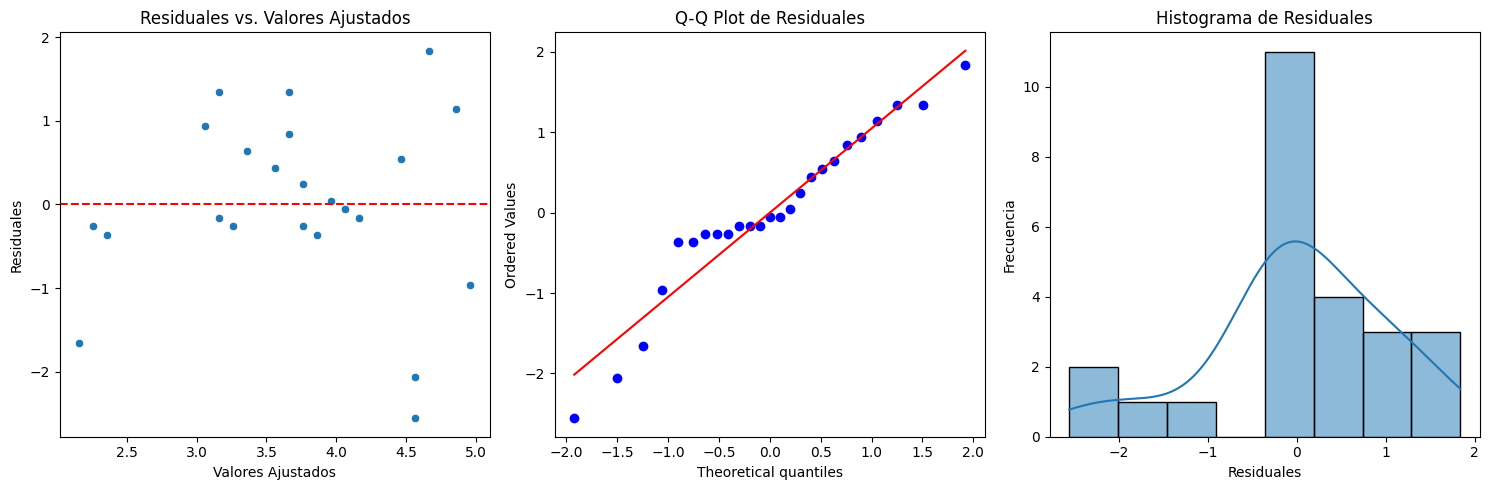

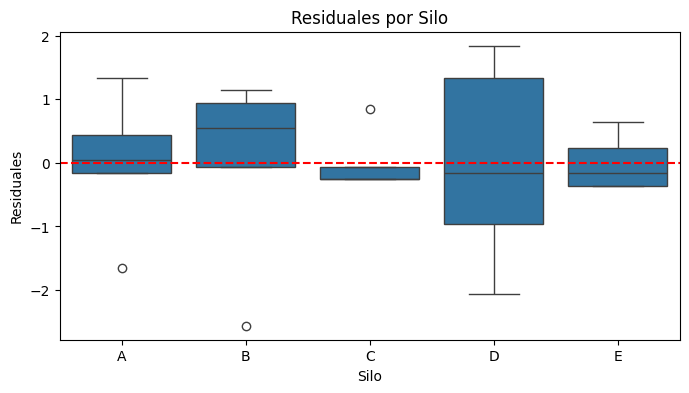

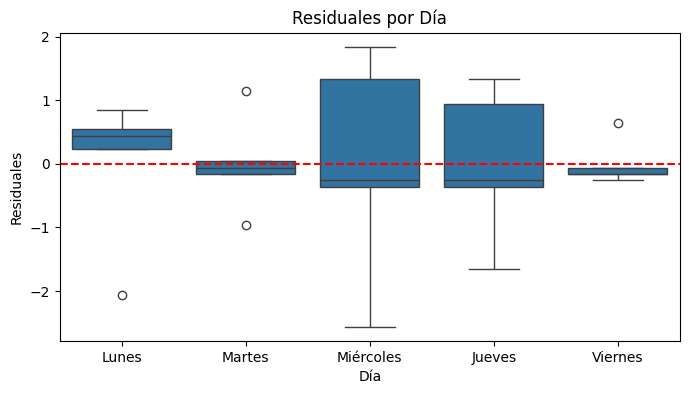


Interpretación de los gráficos de residuos:
1. **Residuales vs. Valores Ajustados:**
   - Idealmente, los puntos deberían estar dispersos aleatoriamente alrededor de cero, sin ningún patrón discernible (forma de embudo, curva, etc.).
   - Observamos una dispersión algo irregular, con algunos puntos alejados de cero. Esto podría indicar alguna heterocedasticidad o la presencia de valores atípicos.
2. **Q-Q Plot de Residuales:**
   - Para normalidad, los puntos deberían seguir de cerca la línea recta diagonal.
   - Los puntos en los extremos (colas) se desvían de la línea recta, especialmente en la cola inferior. Esto sugiere una posible desviación de la normalidad (distribución de los errores).
3. **Histograma de Residuales:**
   - Debería parecerse a una campana simétrica, característica de una distribución normal.
   - El histograma muestra una ligera asimetría y posiblemente una cola más larga a la izquierda, lo que también apunta a una desviación de la normalidad.
4. **Residuales p

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Entry ---
# The data from your table
data = {
    'Silo': ['A', 'A', 'A', 'A', 'A',
             'B', 'B', 'B', 'B', 'B',
             'C', 'C', 'C', 'C', 'C',
             'D', 'D', 'D', 'D', 'D',
             'E', 'E', 'E', 'E', 'E'],
    'Day': ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
            'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
            'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
            'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
            'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'],
    'Temperature': [4.0, 4.0, 5.0, 0.5, 3.0,
                    5.0, 6.0, 2.0, 4.0, 4.0,
                    4.5, 4.0, 3.5, 2.0, 3.0,
                    2.5, 4.0, 6.5, 4.5, 4.0,
                    4.0, 4.0, 3.5, 2.0, 4.0]
}
df = pd.DataFrame(data)

print("DataFrame creado:")
print(df)
print("\n")

# Convert 'Silo' and 'Day' to categorical types for proper ANOVA
df['Silo'] = pd.Categorical(df['Silo'])
df['Day'] = pd.Categorical(df['Day'], categories=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'], ordered=True)


# --- a) Identificar factor de tratamiento y bloque ---
print("a) Identificación de factores:")
print("   Factor de Tratamiento: Silo")
print("   Factor de Bloque: Día\n")


# --- b) Formular hipótesis y modelo estadístico (DBCA) ---
print("b) Hipótesis y modelo estadístico (DBCA):")
print("   Hipótesis para Silos (Tratamiento):")
print("     H0: No hay diferencia significativa en la temperatura promedio entre los silos.")
print("     H1: Al menos un silo tiene una temperatura promedio significativamente diferente.")
print("\n   Hipótesis para Días (Bloque):")
print("     H0: No hay diferencia significativa en la temperatura promedio entre los días.")
print("     H1: Al menos un día tiene una temperatura promedio significativamente diferente.")
print("\n   Modelo Estadístico para DBCA:")
print("     $Y_{ij} = \\mu + \\tau_i + \\beta_j + \\epsilon_{ij}$")
print("     Donde:")
print("       $Y_{ij}$: Temperatura observada del silo $i$ en el día $j$.")
print("       $\\mu$: Media general de la temperatura.")
print("       $\\tau_i$: Efecto del $i$-ésimo silo (tratamiento).")
print("       $\\beta_j$: Efecto del $j$-ésimo día (bloque).")
print("       $\\epsilon_{ij}$: Error aleatorio, $\\epsilon_{ij} \\sim N(0, \\sigma^2)$.\n")


# --- c) y d) Realizar ANOVA y responder si hay diferencia entre silos y días ---
print("c) y d) Análisis de Varianza (ANOVA):")

# Fit the ANOVA model using statsmodels (formula 'C(Silo)' and 'C(Day)' indicates categorical variables)
model = ols('Temperature ~ C(Silo) + C(Day)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2) # typ=2 for Type II Sums of Squares, suitable for balanced designs

print(anova_table)
print("\n")

# Interpretation for Silos
f_silos = anova_table['F']['C(Silo)']
p_value_silos = anova_table['PR(>F)']['C(Silo)']
alpha = 0.05

print(f"Resultado para Silos:")
print(f"F-statistic: {f_silos:.3f}")
print(f"P-value: {p_value_silos:.3f}")
if p_value_silos < alpha:
    print(f"Como el p-value ({p_value_silos:.3f}) < alpha ({alpha}), se rechaza H0.")
    print("Conclusión: Sí hay diferencia significativa en la temperatura promedio entre los silos.")
else:
    print(f"Como el p-value ({p_value_silos:.3f}) >= alpha ({alpha}), no se rechaza H0.")
    print("Conclusión: No hay evidencia suficiente para afirmar que hay diferencia significativa en la temperatura promedio entre los silos.")
print("\n")

# Interpretation for Days
f_days = anova_table['F']['C(Day)']
p_value_days = anova_table['PR(>F)']['C(Day)']

print(f"Resultado para Días:")
print(f"F-statistic: {f_days:.3f}")
print(f"P-value: {p_value_days:.3f}")
if p_value_days < alpha:
    print(f"Como el p-value ({p_value_days:.3f}) < alpha ({alpha}), se rechaza H0.")
    print("Conclusión: Sí hay diferencia significativa en la temperatura promedio de un día a otro.")
else:
    print(f"Como el p-value ({p_value_days:.3f}) >= alpha ({alpha}), no se rechaza H0.")
    print("Conclusión: No hay evidencia para afirmar que hay diferencia significativa en la temperatura promedio de un día a otro.")
print("\n")


# --- e) Revisar residuos ---
print("e) Revisión de Residuos:")

# Get the residuals from the model
residuals = model.resid
fitted_values = model.fittedvalues

print("Primeros 5 residuos:")
print(residuals.head())
print("\n")

# Plotting residuals
plt.figure(figsize=(15, 5))

# 1. Residuals vs. Fitted Values (for checking homoscedasticity)
plt.subplot(1, 3, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuales vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')

# 2. Q-Q Plot (for checking normality)
plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuales')

# 3. Histogram of Residuals (for checking normality and distribution shape)
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True)
plt.title('Histograma de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Residuals by Silo
plt.figure(figsize=(8, 4))
sns.boxplot(x='Silo', y=residuals, data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuales por Silo')
plt.xlabel('Silo')
plt.ylabel('Residuales')
plt.show()

# Residuals by Day
plt.figure(figsize=(8, 4))
sns.boxplot(x='Day', y=residuals, data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuales por Día')
plt.xlabel('Día')
plt.ylabel('Residuales')
plt.show()


# Karla María Macías Chávez

## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



DataFrame creado:
   Detergente    Lavadora  Blancura
0           A  Lavadora 1        45
1           A  Lavadora 2        43
2           A  Lavadora 3        51
3           B  Lavadora 1        47
4           B  Lavadora 2        44
5           B  Lavadora 3        52
6           C  Lavadora 1        50
7           C  Lavadora 2        49
8           C  Lavadora 3        57
9           D  Lavadora 1        42
10          D  Lavadora 2        37
11          D  Lavadora 3        49


a) Nombre del diseño experimental utilizado:
   El diseño experimental utilizado es un Diseño de Bloques Completos al Azar (DBCA).

b) Hipótesis y modelo estadístico:
   Hipótesis para Detergentes (Tratamiento):
     H0: No hay diferencia significativa en la blancura promedio entre los detergentes.
     H1: Al menos un detergente tiene una blancura promedio significativamente diferente.

   Hipótesis para Lavadoras (Bloque):
     H0: No hay diferencia significativa en la blancura promedio debida a los model

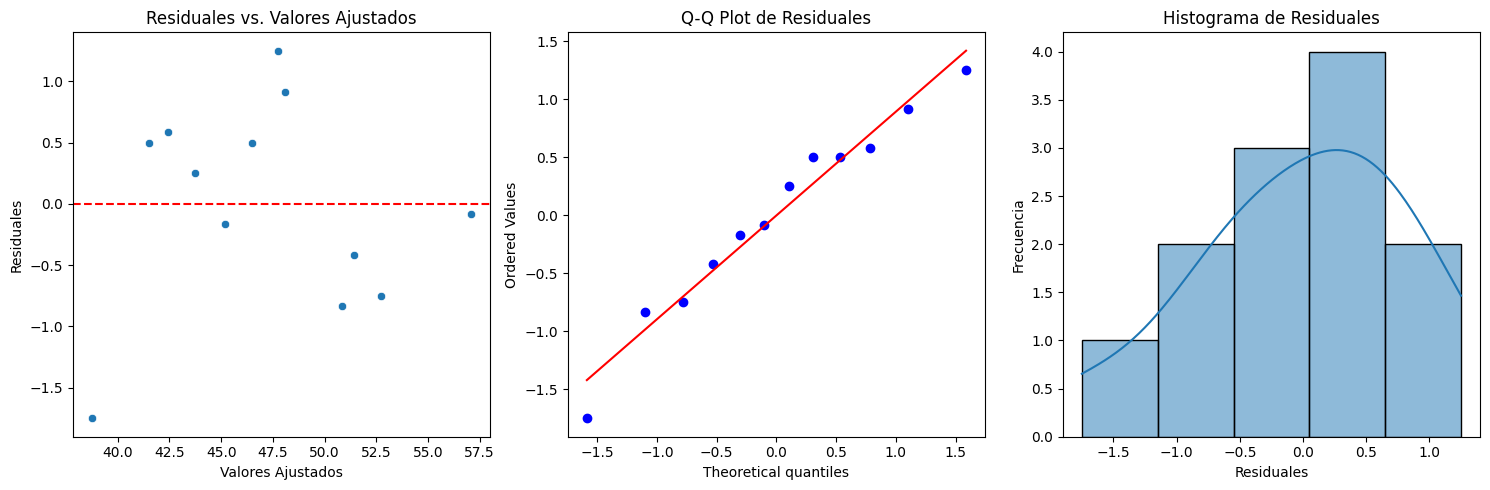

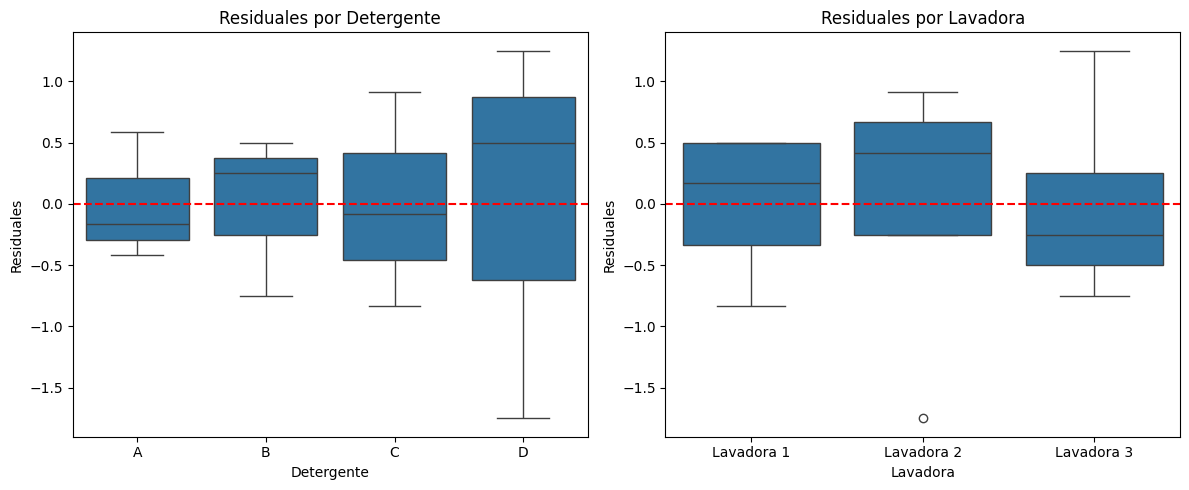

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Detergente': ['A', 'A', 'A',
                   'B', 'B', 'B',
                   'C', 'C', 'C',
                   'D', 'D', 'D'],
    'Lavadora': ['Lavadora 1', 'Lavadora 2', 'Lavadora 3',
                 'Lavadora 1', 'Lavadora 2', 'Lavadora 3',
                 'Lavadora 1', 'Lavadora 2', 'Lavadora 3',
                 'Lavadora 1', 'Lavadora 2', 'Lavadora 3'],
    'Blancura': [45, 43, 51,
                 47, 44, 52,
                 50, 49, 57,
                 42, 37, 49]
}
df = pd.DataFrame(data)

print("DataFrame creado:")
print(df)
print("\n")


df['Detergente'] = pd.Categorical(df['Detergente'])
df['Lavadora'] = pd.Categorical(df['Lavadora'])


print("a) Nombre del diseño experimental utilizado:")
print("   El diseño experimental utilizado es un Diseño de Bloques Completos al Azar (DBCA).\n")



print("b) Hipótesis y modelo estadístico:")
print("   Hipótesis para Detergentes (Tratamiento):")
print("     H0: No hay diferencia significativa en la blancura promedio entre los detergentes.")
print("     H1: Al menos un detergente tiene una blancura promedio significativamente diferente.")
print("\n   Hipótesis para Lavadoras (Bloque):")
print("     H0: No hay diferencia significativa en la blancura promedio debida a los modelos de lavadoras.")
print("     H1: Al menos un modelo de lavadora tiene una blancura promedio significativamente diferente.")
print("\n   Modelo Estadístico para DBCA:")
print("     $Y_{ij} = \\mu + \\tau_i + \\beta_j + \\epsilon_{ij}$")
print("     Donde:")
print("       $Y_{ij}$: Lectura de blancura para el detergente $i$ en la lavadora $j$.")
print("       $\\mu$: Media general de la blancura.")
print("       $\\tau_i$: Efecto del $i$-ésimo detergente.")
print("       $\\beta_j$: Efecto del $j$-ésimo modelo de lavadora.")
print("       $\\epsilon_{ij}$: Error aleatorio, $\\epsilon_{ij} \\sim N(0, \\sigma^2)$.\n")



print("c) Análisis estadístico (ANOVA) y conclusiones:")


model = ols('Blancura ~ C(Detergente) + C(Lavadora)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Tabla ANOVA:")
print(anova_table)
print("\n")

alpha = 0.05 # Nivel de significancia

# Interpretación para Detergentes
f_detergentes = anova_table['F']['C(Detergente)']
p_value_detergentes = anova_table['PR(>F)']['C(Detergente)']

print(f"Resultado para Detergentes:")
print(f"F-statistic: {f_detergentes:.3f}")
print(f"P-value: {p_value_detergentes:.3f}")
if p_value_detergentes < alpha:
    print(f"Como el p-value ({p_value_detergentes:.3f}) < alpha ({alpha}), se rechaza H0.")
    print("Conclusión: Sí hay diferencia significativa en la blancura promedio entre los detergentes.")
else:
    print(f"Como el p-value ({p_value_detergentes:.3f}) >= alpha ({alpha}), no se rechaza H0.")
    print("Conclusión: No hay evidencia suficiente para afirmar que hay diferencia significativa en la blancura promedio entre los detergentes.")
print("\n")

# Interpretación para Lavadoras
f_lavadoras = anova_table['F']['C(Lavadora)']
p_value_lavadoras = anova_table['PR(>F)']['C(Lavadora)']

print(f"Resultado para Lavadoras:")
print(f"F-statistic: {f_lavadoras:.3f}")
print(f"P-value: {p_value_lavadoras:.3f}")
if p_value_lavadoras < alpha:
    print(f"Como el p-value ({p_value_lavadoras:.3f}) < alpha ({alpha}), se rechaza H0.")
    print("Conclusión: Sí hay diferencia significativa en la blancura promedio debida a los modelos de lavadoras (el bloqueo fue efectivo).")
else:
    print(f"Como el p-value ({p_value_lavadoras:.3f}) >= alpha ({alpha}), no se rechaza H0.")
    print("Conclusión: No hay evidencia suficiente para afirmar que hay diferencia significativa en la blancura promedio debida a los modelos de lavadoras (el bloqueo no fue significativo).")
print("\n")


# --- Análisis de Residuos
print("Revisión de Residuos (para verificar supuestos del modelo):")

residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuales vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')


plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuales')


plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True)
plt.title('Histograma de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Detergente', y=residuals, data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuales por Detergente')
plt.xlabel('Detergente')
plt.ylabel('Residuales')

plt.subplot(1, 2, 2)
sns.boxplot(x='Lavadora', y=residuals, data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuales por Lavadora')
plt.xlabel('Lavadora')
plt.ylabel('Residuales')
plt.tight_layout()
plt.show()

# Karla María Macías Chávez

## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



data_rows = [
    {'Detergente': 'A', 'Lavadora': 'Lavadora 1', 'Blancura': 45},
    {'Detergente': 'A', 'Lavadora': 'Lavadora 2', 'Blancura': 43},
    {'Detergente': 'A', 'Lavadora': 'Lavadora 3', 'Blancura': 51},
    {'Detergente': 'B', 'Lavadora': 'Lavadora 1', 'Blancura': 47},
    {'Detergente': 'B', 'Lavadora': 'Lavadora 2', 'Blancura': 44},
    {'Detergente': 'B', 'Lavadora': 'Lavadora 3', 'Blancura': 52},
    {'Detergente': 'C', 'Lavadora': 'Lavadora 1', 'Blancura': 50},
    {'Detergente': 'C', 'Lavadora': 'Lavadora 2', 'Blancura': 49},
    {'Detergente': 'C', 'Lavadora': 'Lavadora 3', 'Blancura': 57},
    {'Detergente': 'D', 'Lavadora': 'Lavadora 1', 'Blancura': 42},
    {'Detergente': 'D', 'Lavadora': 'Lavadora 2', 'Blancura': 37},
    {'Detergente': 'D', 'Lavadora': 'Lavadora 3', 'Blancura': 49},
]

df = pd.DataFrame(data_rows)


df['Detergente'] = df['Detergente'].astype('category')
df['Lavadora'] = df['Lavadora'].astype('category')

print("--- Datos del Experimento (Basado en Problema 3) ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")

alpha = 0.05


model_prob3_dbca = ols('Blancura ~ C(Detergente) + C(Lavadora)', data=df).fit()
anova_prob3_dbca = sm.stats.anova_lm(model_prob3_dbca, typ=2)

p_value_detergente_prob3 = anova_prob3_dbca['PR(>F)'][0]
p_value_lavadora_prob3 = anova_prob3_dbca['PR(>F)'][1]

cme_prob3 = anova_prob3_dbca['sum_sq'][2] / anova_prob3_dbca['df'][2]



print("--- a) Re-análisis del Problema 3 sin el efecto de las lavadoras ---")


print("\n**a.1) Nombre del Diseño Experimental:**")
print("Al no tomar en cuenta el efecto de las lavadoras, el diseño se convierte en un **Diseño Completamente Aleatorizado (DCA)**.")
print("Solo el 'Detergente' es el factor de tratamiento.")



print("\n**a.2) Hipótesis a Probar (DCA sin Lavadoras):**")
print("Para el efecto principal del Detergente:")
print("H0_Detergente: No hay diferencia significativa en la blancura promedio obtenida por los diferentes detergentes (μA = μB = μC = μD).")
print("H1_Detergente: Existe una diferencia significativa en la blancura promedio obtenida por al menos dos detergentes (no todas las μi son iguales).")



print("\n**a.3) Análisis Estadístico y Conclusiones (DCA sin Lavadoras):**")


model_dca = ols('Blancura ~ C(Detergente)', data=df).fit()


anova_table_dca = sm.stats.anova_lm(model_dca, typ=2)

print("\nTabla ANOVA (DCA sin Lavadoras):")
print(anova_table_dca)

p_value_detergente_dca = anova_table_dca['PR(>F)'][0]

print(f"\nP-valor para el efecto del Detergente en el modelo DCA: {p_value_detergente_dca:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")


if p_value_detergente_dca < alpha:
    print("\nConclusión sobre Detergentes (DCA): Existe evidencia estadística para afirmar que hay diferencias significativas en la blancura promedio obtenida por los diferentes detergentes.")
    print("Realizando pruebas post-hoc (Tukey HSD) para identificar cuáles detergentes son diferentes:")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result_dca = pairwise_tukeyhsd(endog=df['Blancura'], groups=df['Detergente'], alpha=alpha)
    print(tukey_result_dca)
else:
    print("\nConclusión sobre Detergentes (DCA): No existe evidencia estadística para afirmar que hay diferencias significativas en la blancura promedio obtenida por los diferentes detergentes.")
print("\n")



print("--- b) Comparación de Conclusiones (Problema 4 vs Problema 3) ---")

print(f"P-valor del Detergente en Problema 3 (DBCA, con Lavadora): {p_value_detergente_prob3:.4f}")
print(f"P-valor del Detergente en Problema 4 (DCA, sin Lavadora): {p_value_detergente_dca:.4f}")
print(f"P-valor de la Lavadora (Bloque) en Problema 3: {p_value_lavadora_prob3:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")


cme_prob4_dca = anova_table_dca['sum_sq'][1] / anova_table_dca['df'][1]

print(f"\nCuadro Medio del Error (CME) en Problema 3 (DBCA): {cme_prob3:.4f}")
print(f"Cuadro Medio del Error (CME) en Problema 4 (DCA): {cme_prob4_dca:.4f}")
print("\n")



print("--- c) Decisión sobre Cuáles Conclusiones Adoptar ---")



print(f"P-valor del factor 'Lavadora' en el Problema 3: {p_value_lavadora_prob3:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")

print("\n")

# Karla María Macías Chávez

--- Datos del Experimento (Basado en Problema 3) ---
  Detergente    Lavadora  Blancura
0          A  Lavadora 1        45
1          A  Lavadora 2        43
2          A  Lavadora 3        51
3          B  Lavadora 1        47
4          B  Lavadora 2        44
Número total de observaciones: 12


--- a) Re-análisis del Problema 3 sin el efecto de las lavadoras ---

**a.1) Nombre del Diseño Experimental:**
Al no tomar en cuenta el efecto de las lavadoras, el diseño se convierte en un **Diseño Completamente Aleatorizado (DCA)**.
Solo el 'Detergente' es el factor de tratamiento.

**a.2) Hipótesis a Probar (DCA sin Lavadoras):**
Para el efecto principal del Detergente:
H0_Detergente: No hay diferencia significativa en la blancura promedio obtenida por los diferentes detergentes (μA = μB = μC = μD).
H1_Detergente: Existe una diferencia significativa en la blancura promedio obtenida por al menos dos detergentes (no todas las μi son iguales).

**a.3) Análisis Estadístico y Conclusiones (DCA 

<ipython-input-26-a74c199232b2>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_detergente_prob3 = anova_prob3_dbca['PR(>F)'][0]
<ipython-input-26-a74c199232b2>:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_lavadora_prob3 = anova_prob3_dbca['PR(>F)'][1]
<ipython-input-26-a74c199232b2>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cme_prob3 = anova_prob3_dbca['sum_sq'][2] / anova_prob3_dbca['df'][2]
<ipython

## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


--- Datos del Experimento ---
   Operador    Equipo  Angulo
0         1  Equipo 1   1.328
1         1  Equipo 1   0.985
2         1  Equipo 1   1.316
3         1  Equipo 1   1.553
4         1  Equipo 1   1.310
Número total de observaciones: 60


--- a) Modelo y Hipótesis ---

**Modelo Estadístico:**
El diseño experimental utilizado es un **Diseño de Bloques Completos Aleatorizados (DBCA)**.
El modelo estadístico lineal aditivo es:
$$ Y_{ijk} = \mu + \alpha_i + \beta_j + \epsilon_{ijk} $$
Donde:
- $Y_{ijk}$: es la $k$-ésima observación del ángulo para el $i$-ésimo Equipo en el $j$-ésimo Operador.
- $\mu$: es la media general del ángulo.
- $lpha_i$: es el efecto del $i$-ésimo Equipo (i = 1, 2).
- $eta_j$: es el efecto del $j$-ésimo Operador (j = 1, 2, 3), considerado como un bloque.
- $\epsilon_{ijk}$: es el error aleatorio experimental, asumiendo $\epsilon_{ijk} \sim N(0, \sigma^2)$ e independientes.
--- b) Diferencias entre los equipos ---

Tabla ANOVA (DBCA):
               sum_sq  

<ipython-input-27-9280ce6765d8>:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_operador = anova_table_dbca['PR(>F)'][1]


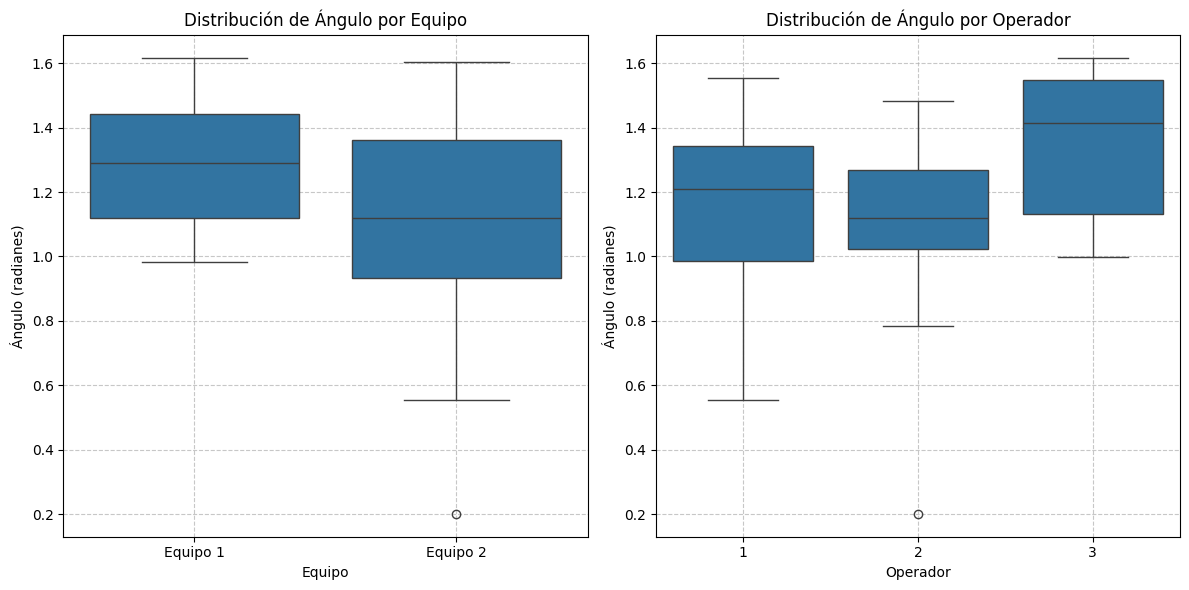

<ipython-input-27-9280ce6765d8>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Equipo', y='Angulo', data=medias_equipo, palette='viridis')
<ipython-input-27-9280ce6765d8>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Operador', y='Angulo', data=medias_operador, palette='viridis')


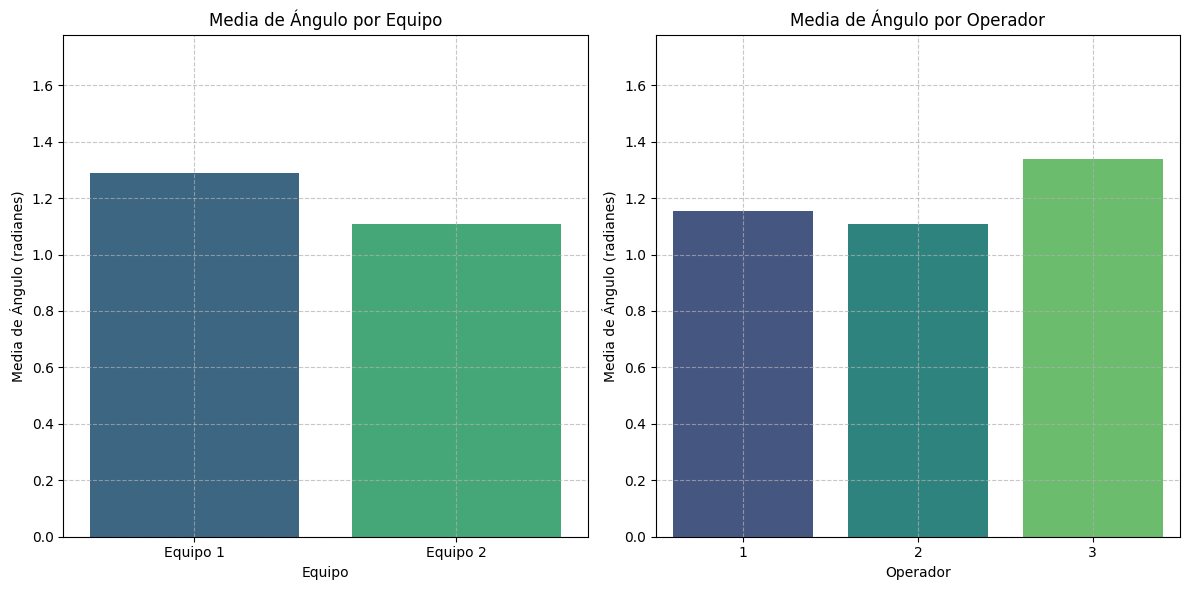



--- e) Verificación de Supuestos y Puntos Aberrantes ---


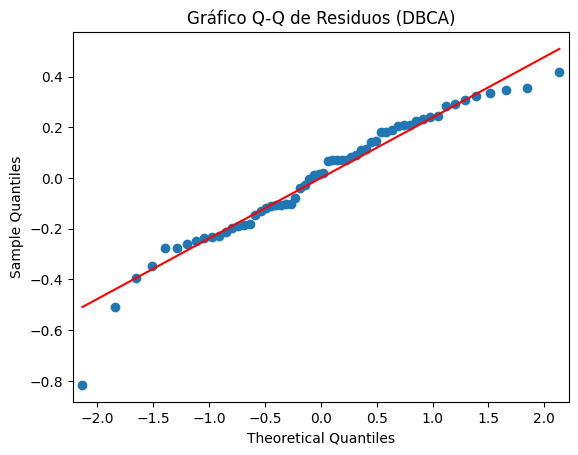


Prueba de Shapiro-Wilk para normalidad de residuos: Estadístico=0.9614, p-valor=0.0550

Prueba de Levene para homocedasticidad (varianzas entre Equipos): Estadístico=4.1246, p-valor=0.0469


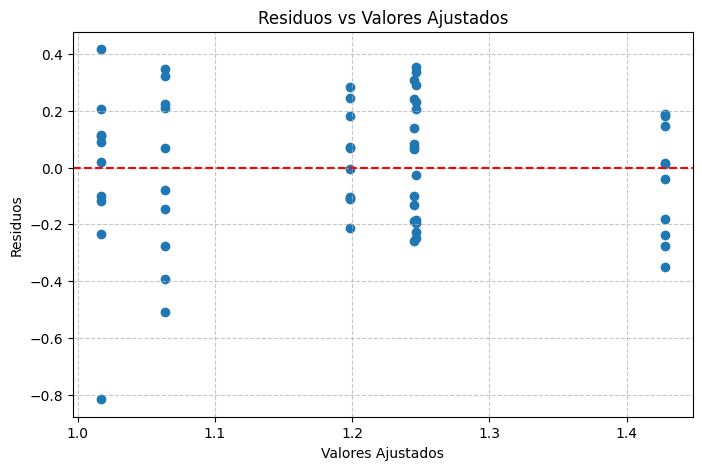


Posibles puntos aberrantes en los residuos (usando método IQR):
35   -0.81605
dtype: float64


In [ ]:


import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


data_equipo1_op1 = [1.328, 0.985, 1.316, 1.553, 1.310, 1.113, 1.057, 1.144, 1.485, 1.386]
data_equipo1_op2 = [1.269, 1.268, 1.091, 1.195, 1.380, 1.093, 0.984, 1.087, 1.482, 1.442]
data_equipo1_op3 = [1.440, 1.079, 1.389, 1.611, 1.445, 1.150, 1.190, 1.247, 1.617, 1.574]

data_equipo2_op1 = [1.273, 0.985, 1.134, 1.412, 0.917, 0.789, 0.671, 0.554, 1.386, 1.289]
data_equipo2_op2 = [1.036, 0.783, 1.108, 1.129, 1.132, 0.201, 0.900, 0.916, 1.434, 1.223]
data_equipo2_op3 = [1.454, 1.063, 1.219, 1.602, 1.583, 1.018, 1.050, 0.997, 1.538, 1.478]


operadores = []
equipos = []
angulos = []


for i in range(len(data_equipo1_op1)):
    operadores.append(1)
    equipos.append('Equipo 1')
    angulos.append(float(data_equipo1_op1[i]))

for i in range(len(data_equipo2_op1)):
    operadores.append(1)
    equipos.append('Equipo 2')
    angulos.append(float(data_equipo2_op1[i]))


for i in range(len(data_equipo1_op2)):
    operadores.append(2)
    equipos.append('Equipo 1')
    angulos.append(float(data_equipo1_op2[i]))

for i in range(len(data_equipo2_op2)):
    operadores.append(2)
    equipos.append('Equipo 2')
    angulos.append(float(data_equipo2_op2[i]))


for i in range(len(data_equipo1_op3)):
    operadores.append(3)
    equipos.append('Equipo 1')
    angulos.append(float(data_equipo1_op3[i]))

for i in range(len(data_equipo2_op3)):
    operadores.append(3)
    equipos.append('Equipo 2')
    angulos.append(float(data_equipo2_op3[i]))


df = pd.DataFrame({
    'Operador': operadores,
    'Equipo': equipos,
    'Angulo': angulos
})

print("--- Datos del Experimento ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")



print("--- a) Modelo y Hipótesis ---")


print("\n**Modelo Estadístico:**")
print("El diseño experimental utilizado es un **Diseño de Bloques Completos Aleatorizados (DBCA)**.")
print("El modelo estadístico lineal aditivo es:")
print(r"$$ Y_{ijk} = \mu + \alpha_i + \beta_j + \epsilon_{ijk} $$")
print("Donde:")
print("- $Y_{ijk}$: es la $k$-ésima observación del ángulo para el $i$-ésimo Equipo en el $j$-ésimo Operador.")
print("- $\mu$: es la media general del ángulo.")
print("- $\alpha_i$: es el efecto del $i$-ésimo Equipo (i = 1, 2).")
print("- $\beta_j$: es el efecto del $j$-ésimo Operador (j = 1, 2, 3), considerado como un bloque.")
print("- $\epsilon_{ijk}$: es el error aleatorio experimental, asumiendo $\epsilon_{ijk} \sim N(0, \sigma^2)$ e independientes.")



print("--- b) Diferencias entre los equipos ---")


model_dbca = ols('Angulo ~ C(Equipo) + C(Operador)', data=df).fit()

anova_table_dbca = sm.stats.anova_lm(model_dbca, typ=2)

print("\nTabla ANOVA (DBCA):")
print(anova_table_dbca)
print("\n")



print("--- c) Diferencias entre los operadores ---")

p_value_operador = anova_table_dbca['PR(>F)'][1]
print(f"El p-valor para el efecto del Operador (Bloque) es: {p_value_operador:.4f}")

print("\n")


print("--- d) Diagramas de Cajas y Gráficas de Medias ---")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Equipo', y='Angulo', data=df)
plt.title('Distribución de Ángulo por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Ángulo (radianes)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.boxplot(x='Operador', y='Angulo', data=df)
plt.title('Distribución de Ángulo por Operador')
plt.xlabel('Operador')
plt.ylabel('Ángulo (radianes)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


medias_equipo = df.groupby('Equipo')['Angulo'].mean().reset_index()
medias_operador = df.groupby('Operador')['Angulo'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Equipo', y='Angulo', data=medias_equipo, palette='viridis')
plt.title('Media de Ángulo por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Media de Ángulo (radianes)')
plt.ylim(0, df['Angulo'].max() * 1.1)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.barplot(x='Operador', y='Angulo', data=medias_operador, palette='viridis')
plt.title('Media de Ángulo por Operador')
plt.xlabel('Operador')
plt.ylabel('Media de Ángulo (radianes)')
plt.ylim(0, df['Angulo'].max() * 1.1)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n")


print("--- e) Verificación de Supuestos y Puntos Aberrantes ---")


residuals_dbca = model_dbca.resid
fig_dbca = sm.qqplot(residuals_dbca, line='s')
plt.title('Gráfico Q-Q de Residuos (DBCA)')
plt.show()

shapiro_test_dbca = stats.shapiro(residuals_dbca)
print(f"\nPrueba de Shapiro-Wilk para normalidad de residuos: Estadístico={shapiro_test_dbca.statistic:.4f}, p-valor={shapiro_test_dbca.pvalue:.4f}")



levene_test_equipo = stats.levene(df['Angulo'][df['Equipo'] == 'Equipo 1'],
                                 df['Angulo'][df['Equipo'] == 'Equipo 2'],
                                 center='median')

print(f"\nPrueba de Levene para homocedasticidad (varianzas entre Equipos): Estadístico={levene_test_equipo.statistic:.4f}, p-valor={levene_test_equipo.pvalue:.4f}")


plt.figure(figsize=(8, 5))
plt.scatter(model_dbca.fittedvalues, residuals_dbca)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Q1, Q3 = np.percentile(residuals_dbca, [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_resid = residuals_dbca[(residuals_dbca < lower_bound) | (residuals_dbca > upper_bound)]

if not outliers_resid.empty:
    print("\nPosibles puntos aberrantes en los residuos (usando método IQR):")
    print(outliers_resid)
else:
    print("\nNo se detectaron puntos aberrantes obvios en los residuos (usando método IQR).")

    # Karla María Macías Chávez

## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



data_rows = [
    # Silo A
    {'Silo': 'A', 'Dia': 1, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.0},
    {'Silo': 'A', 'Dia': 1, 'Tipo_Termometro': 'Rtd', 'Temperatura': 2.6},
    {'Silo': 'A', 'Dia': 2, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.0},
    {'Silo': 'A', 'Dia': 2, 'Tipo_Termometro': 'Rtd', 'Temperatura': 2.8},
    {'Silo': 'A', 'Dia': 3, 'Tipo_Termometro': 'Mer', 'Temperatura': 5.0},
    {'Silo': 'A', 'Dia': 3, 'Tipo_Termometro': 'Rtd', 'Temperatura': 0.5},
    {'Silo': 'A', 'Dia': 4, 'Tipo_Termometro': 'Mer', 'Temperatura': 0.0},
    {'Silo': 'A', 'Dia': 4, 'Tipo_Termometro': 'Rtd', 'Temperatura': 0.0},
    {'Silo': 'A', 'Dia': 5, 'Tipo_Termometro': 'Mer', 'Temperatura': 3.0},
    {'Silo': 'A', 'Dia': 5, 'Tipo_Termometro': 'Rtd', 'Temperatura': 2.4},

    # Silo B
    {'Silo': 'B', 'Dia': 1, 'Tipo_Termometro': 'Mer', 'Temperatura': 5.0},
    {'Silo': 'B', 'Dia': 1, 'Tipo_Termometro': 'Rtd', 'Temperatura': 6.4},
    {'Silo': 'B', 'Dia': 2, 'Tipo_Termometro': 'Mer', 'Temperatura': 6.0},
    {'Silo': 'B', 'Dia': 2, 'Tipo_Termometro': 'Rtd', 'Temperatura': 6.4},
    {'Silo': 'B', 'Dia': 3, 'Tipo_Termometro': 'Mer', 'Temperatura': 2.0},
    {'Silo': 'B', 'Dia': 3, 'Tipo_Termometro': 'Rtd', 'Temperatura': 2.3},
    {'Silo': 'B', 'Dia': 4, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.0},
    {'Silo': 'B', 'Dia': 4, 'Tipo_Termometro': 'Rtd', 'Temperatura': 4.2},
    {'Silo': 'B', 'Dia': 5, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.0},
    {'Silo': 'B', 'Dia': 5, 'Tipo_Termometro': 'Rtd', 'Temperatura': 3.0},

    # Silo C
    {'Silo': 'C', 'Dia': 1, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.5},
    {'Silo': 'C', 'Dia': 1, 'Tipo_Termometro': 'Rtd', 'Temperatura': 3.3},
    {'Silo': 'C', 'Dia': 2, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.0},
    {'Silo': 'C', 'Dia': 2, 'Tipo_Termometro': 'Rtd', 'Temperatura': 1.4},
    {'Silo': 'C', 'Dia': 3, 'Tipo_Termometro': 'Mer', 'Temperatura': 3.5},
    {'Silo': 'C', 'Dia': 3, 'Tipo_Termometro': 'Rtd', 'Temperatura': 1.8},
    {'Silo': 'C', 'Dia': 4, 'Tipo_Termometro': 'Mer', 'Temperatura': 2.0},
    {'Silo': 'C', 'Dia': 4, 'Tipo_Termometro': 'Rtd', 'Temperatura': -1.9},
    {'Silo': 'C', 'Dia': 5, 'Tipo_Termometro': 'Mer', 'Temperatura': 3.0},
    {'Silo': 'C', 'Dia': 5, 'Tipo_Termometro': 'Rtd', 'Temperatura': -7.6},

    # Silo D
    {'Silo': 'D', 'Dia': 1, 'Tipo_Termometro': 'Mer', 'Temperatura': 2.5},
    {'Silo': 'D', 'Dia': 1, 'Tipo_Termometro': 'Rtd', 'Temperatura': 3.1},
    {'Silo': 'D', 'Dia': 2, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.0},
    {'Silo': 'D', 'Dia': 2, 'Tipo_Termometro': 'Rtd', 'Temperatura': 5.0},
    {'Silo': 'D', 'Dia': 3, 'Tipo_Termometro': 'Mer', 'Temperatura': 6.5},
    {'Silo': 'D', 'Dia': 3, 'Tipo_Termometro': 'Rtd', 'Temperatura': 6.6},
    {'Silo': 'D', 'Dia': 4, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.5},
    {'Silo': 'D', 'Dia': 4, 'Tipo_Termometro': 'Rtd', 'Temperatura': 2.7},
    {'Silo': 'D', 'Dia': 5, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.0},
    {'Silo': 'D', 'Dia': 5, 'Tipo_Termometro': 'Rtd', 'Temperatura': 4.0},

    # Silo E
    {'Silo': 'E', 'Dia': 1, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.0},
    {'Silo': 'E', 'Dia': 1, 'Tipo_Termometro': 'Rtd', 'Temperatura': 0.0},
    {'Silo': 'E', 'Dia': 2, 'Tipo_Termometro': 'Mer', 'Temperatura': 4.0},
    {'Silo': 'E', 'Dia': 2, 'Tipo_Termometro': 'Rtd', 'Temperatura': 0.0},
    {'Silo': 'E', 'Dia': 3, 'Tipo_Termometro': 'Mer', 'Temperatura': 3.5},
    {'Silo': 'E', 'Dia': 3, 'Tipo_Termometro': 'Rtd', 'Temperatura': 0.6},
    {'Silo': 'E', 'Dia': 4, 'Tipo_Termometro': 'Mer', 'Temperatura': -4.0},
    {'Silo': 'E', 'Dia': 4, 'Tipo_Termometro': 'Rtd', 'Temperatura': -4.0},
    {'Silo': 'E', 'Dia': 5, 'Tipo_Termometro': 'Mer', 'Temperatura': -4.0},
    {'Silo': 'E', 'Dia': 5, 'Tipo_Termometro': 'Rtd', 'Temperatura': -6.3},
]

df = pd.DataFrame(data_rows)


df['Silo'] = df['Silo'].astype('category')
df['Dia'] = df['Dia'].astype('category')
df['Tipo_Termometro'] = df['Tipo_Termometro'].astype('category')

print("--- Datos del Experimento ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")



print("--- a) Observación de datos Rtd vs Mer ---")

df_pivot = df.pivot_table(index=['Silo', 'Dia'], columns='Tipo_Termometro', values='Temperatura')
print("Datos pivotados para comparación Mer vs Rtd:")
print(df_pivot)


df_pivot['Diferencia'] = df_pivot['Mer'] - df_pivot['Rtd']
print("\nDiferencias de temperatura (Mer - Rtd):")
print(df_pivot)

print("\n")



print("--- b) Análisis de datos Rtd (ANOVA) ---")

df_rtd = df[df['Tipo_Termometro'] == 'Rtd'].copy()


model_rtd = ols('Temperatura ~ C(Silo) + C(Dia)', data=df_rtd).fit()


anova_table_rtd = sm.stats.anova_lm(model_rtd, typ=2)

print("\nTabla ANOVA para mediciones Rtd:")
print(anova_table_rtd)
print("\n")



print("--- c) Análisis de datos Mer (ANOVA) ---")

df_mer = df[df['Tipo_Termometro'] == 'Mer'].copy()


model_mer = ols('Temperatura ~ C(Silo) + C(Dia)', data=df_mer).fit()


anova_table_mer = sm.stats.anova_lm(model_mer, typ=2)

print("\nTabla ANOVA para mediciones Mer:")
print(anova_table_mer)
print("\n")



print("--- d) Comparación de Conclusiones Mer vs Rtd ---")

print("Tabla ANOVA para Rtd:")
print(anova_table_rtd)
print("\nTabla ANOVA para Mer:")
print(anova_table_mer)
print("\n")



print("--- e) Análisis de Datos Pareados (Diferencias Mer - Rtd) ---")


df_diff = df_pivot.reset_index()
df_diff = df_diff[['Silo', 'Dia', 'Diferencia']]

print("\nDataFrame de Diferencias (Mer - Rtd):")
print(df_diff.head())


model_diff = ols('Diferencia ~ C(Silo) + C(Dia)', data=df_diff).fit()


anova_table_diff = sm.stats.anova_lm(model_diff, typ=2)

print("\nTabla ANOVA para las Diferencias (Mer - Rtd):")
print(anova_table_diff)
print("\n")



t_test_result = stats.ttest_1samp(df_diff['Diferencia'], 0)
print(f"Prueba t de una muestra sobre la media de las diferencias (H0: media=0):")
print(f"Estadístico t = {t_test_result.statistic:.4f}, p-valor = {t_test_result.pvalue:.4f}")

print("\n")

# Karla María Macías Chávez

--- Datos del Experimento ---
  Silo Dia Tipo_Termometro  Temperatura
0    A   1             Mer          4.0
1    A   1             Rtd          2.6
2    A   2             Mer          4.0
3    A   2             Rtd          2.8
4    A   3             Mer          5.0
Número total de observaciones: 50


--- a) Observación de datos Rtd vs Mer ---
Datos pivotados para comparación Mer vs Rtd:
Tipo_Termometro  Mer  Rtd
Silo Dia                 
A    1           4.0  2.6
     2           4.0  2.8
     3           5.0  0.5
     4           0.0  0.0
     5           3.0  2.4
B    1           5.0  6.4
     2           6.0  6.4
     3           2.0  2.3
     4           4.0  4.2
     5           4.0  3.0
C    1           4.5  3.3
     2           4.0  1.4
     3           3.5  1.8
     4           2.0 -1.9
     5           3.0 -7.6
D    1           2.5  3.1
     2           4.0  5.0
     3           6.5  6.6
     4           4.5  2.7
     5           4.0  4.0
E    1           4.0  0.0
     2  

<ipython-input-28-0ca7e6182da3>:89: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df.pivot_table(index=['Silo', 'Dia'], columns='Tipo_Termometro', values='Temperatura')


## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


--- Datos del Experimento ---
  Lote Dia Catalizador  Tiempo_Reaccion
0    1   1           A                8
1    1   2           B                7
2    1   3           D                1
3    1   4           C                7
4    1   5           E                3
Número total de observaciones: 25


--- a) Aleatorización del Experimento ---
El experimento se aleatorizó mediante un diseño de Cuadro Latino. Esto implica que cada catalizador aparece una y solo una vez en cada fila (Lote) y en cada columna (Día). La asignación específica de los catalizadores a las celdas de lote y día sigue una estructura predefinida de cuadro latino, lo que asegura que los efectos de lotes y días estén balanceados sobre los catalizadores. Dentro de cada celda, la medición del tiempo de reacción es la observación.


--- b) Ecuación del Modelo ---
El modelo estadístico para un diseño de Cuadro Latino es:
$$ Y_{ijk} = \mu + \alpha_i + \beta_j + \gamma_k + \epsilon_{ijk} $$
Donde:
- $Y_{ijk}$: es el tiem

<ipython-input-29-ccfebb6aa2a0>:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_catalizador = anova_table_cuadro_latino['PR(>F)'][2]


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


--- d) Efecto de Factores de Ruido (Lote y Día) ---

Tabla ANOVA para referencia:
                sum_sq    df          F    PR(>F)
C(Lote)          15.44   4.0   1.234542  0.347618
C(Dia)           12.24   4.0   0.978678  0.455014
C(Catalizador)  141.44  

<ipython-input-29-ccfebb6aa2a0>:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_lote = anova_table_cuadro_latino['PR(>F)'][0]
<ipython-input-29-ccfebb6aa2a0>:121: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_dia = anova_table_cuadro_latino['PR(>F)'][1]
<ipython-input-29-ccfebb6aa2a0>:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Catalizador', y='Tiempo_Reaccion', data=df, errorbar='se', palette='viridis')
<ipython-input-29-ccfebb6aa2a0>:145:

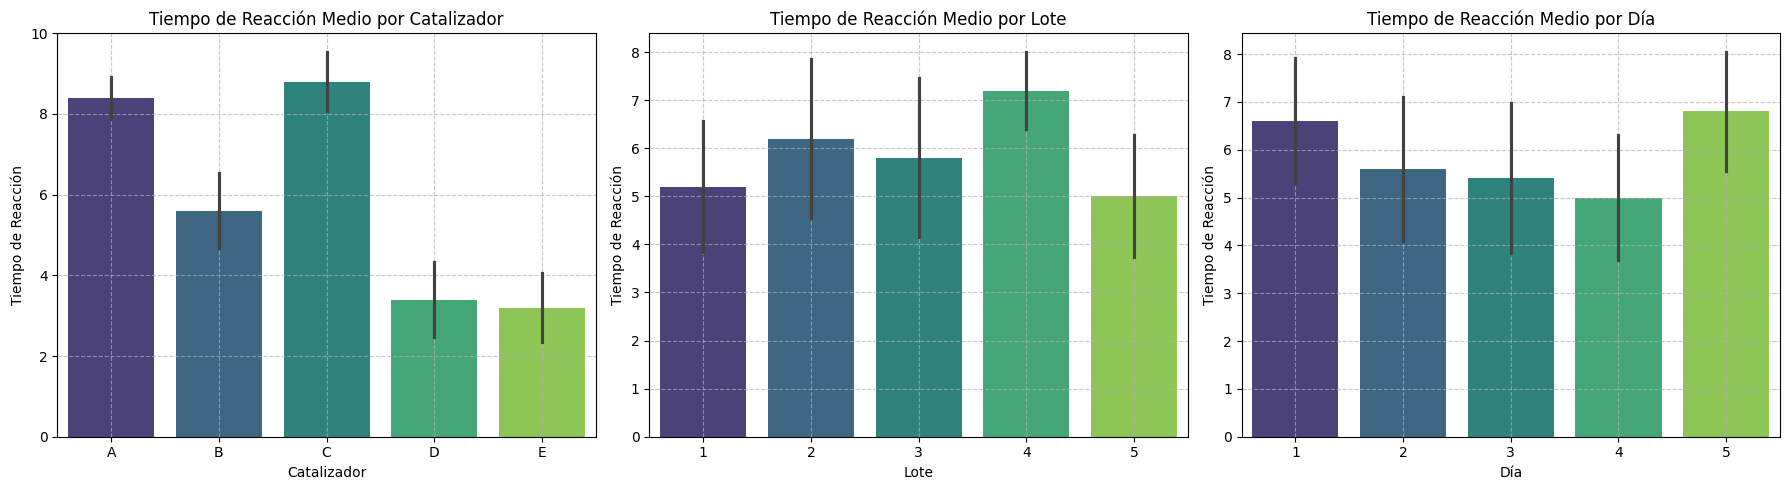

<ipython-input-29-ccfebb6aa2a0>:163: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_time_by_catalyst = df.groupby('Catalizador')['Tiempo_Reaccion'].mean().sort_values(ascending=True)



Tiempos de Reacción Medios por Catalizador (Ordenados de Menor a Mayor):
Catalizador
E    3.2
D    3.4
B    5.6
A    8.4
C    8.8
Name: Tiempo_Reaccion, dtype: float64

El mejor catalizador (menor tiempo de reacción promedio) es: E


--- f) Verificación de Supuestos del Modelo ---


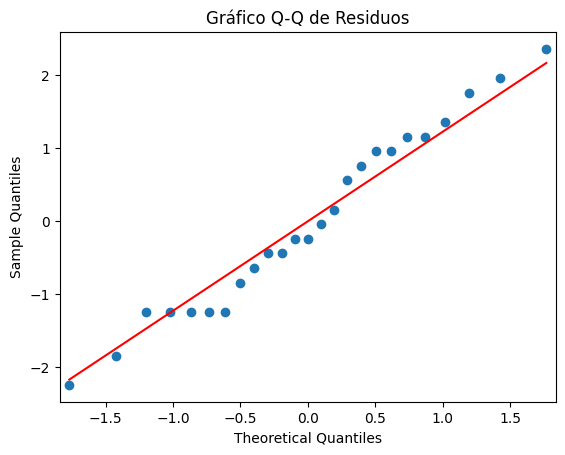


Prueba de Shapiro-Wilk para normalidad de residuos: Estadístico=0.9661, p-valor=0.5476


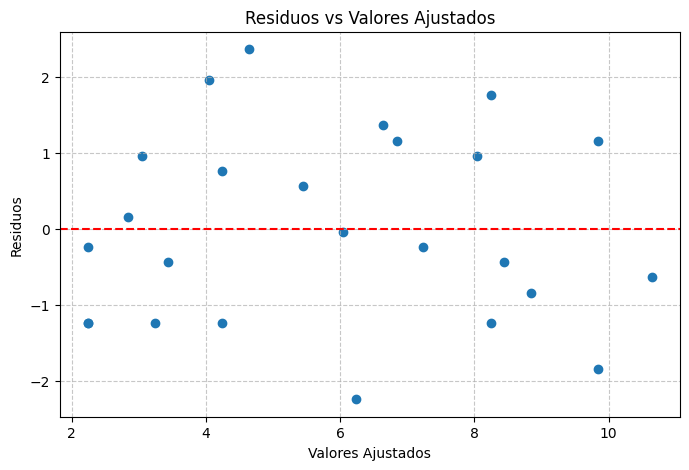


Prueba de Levene para homocedasticidad (varianzas entre Catalizadores): Estadístico=0.4444, p-valor=0.7751

No se detectaron puntos aberrantes obvios en los residuos (usando método IQR).




In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



data_rows = [
    # Lote 1
    {'Lote': 1, 'Dia': 1, 'Catalizador': 'A', 'Tiempo_Reaccion': 8},
    {'Lote': 1, 'Dia': 2, 'Catalizador': 'B', 'Tiempo_Reaccion': 7},
    {'Lote': 1, 'Dia': 3, 'Catalizador': 'D', 'Tiempo_Reaccion': 1},
    {'Lote': 1, 'Dia': 4, 'Catalizador': 'C', 'Tiempo_Reaccion': 7},
    {'Lote': 1, 'Dia': 5, 'Catalizador': 'E', 'Tiempo_Reaccion': 3},

    # Lote 2
    {'Lote': 2, 'Dia': 1, 'Catalizador': 'C', 'Tiempo_Reaccion': 11},
    {'Lote': 2, 'Dia': 2, 'Catalizador': 'E', 'Tiempo_Reaccion': 2},
    {'Lote': 2, 'Dia': 3, 'Catalizador': 'A', 'Tiempo_Reaccion': 7},
    {'Lote': 2, 'Dia': 4, 'Catalizador': 'D', 'Tiempo_Reaccion': 3},
    {'Lote': 2, 'Dia': 5, 'Catalizador': 'B', 'Tiempo_Reaccion': 8},

    # Lote 3
    {'Lote': 3, 'Dia': 1, 'Catalizador': 'B', 'Tiempo_Reaccion': 4},
    {'Lote': 3, 'Dia': 2, 'Catalizador': 'A', 'Tiempo_Reaccion': 9},
    {'Lote': 3, 'Dia': 3, 'Catalizador': 'C', 'Tiempo_Reaccion': 10},
    {'Lote': 3, 'Dia': 4, 'Catalizador': 'E', 'Tiempo_Reaccion': 1},
    {'Lote': 3, 'Dia': 5, 'Catalizador': 'D', 'Tiempo_Reaccion': 5},

    # Lote 4
    {'Lote': 4, 'Dia': 1, 'Catalizador': 'D', 'Tiempo_Reaccion': 6},
    {'Lote': 4, 'Dia': 2, 'Catalizador': 'C', 'Tiempo_Reaccion': 8},
    {'Lote': 4, 'Dia': 3, 'Catalizador': 'E', 'Tiempo_Reaccion': 6},
    {'Lote': 4, 'Dia': 4, 'Catalizador': 'B', 'Tiempo_Reaccion': 6},
    {'Lote': 4, 'Dia': 5, 'Catalizador': 'A', 'Tiempo_Reaccion': 10},

    # Lote 5
    {'Lote': 5, 'Dia': 1, 'Catalizador': 'E', 'Tiempo_Reaccion': 4},
    {'Lote': 5, 'Dia': 2, 'Catalizador': 'D', 'Tiempo_Reaccion': 2},
    {'Lote': 5, 'Dia': 3, 'Catalizador': 'B', 'Tiempo_Reaccion': 3},
    {'Lote': 5, 'Dia': 4, 'Catalizador': 'A', 'Tiempo_Reaccion': 8},
    {'Lote': 5, 'Dia': 5, 'Catalizador': 'C', 'Tiempo_Reaccion': 8},
]

df = pd.DataFrame(data_rows)


df['Lote'] = df['Lote'].astype('category')
df['Dia'] = df['Dia'].astype('category')
df['Catalizador'] = df['Catalizador'].astype('category')

print("--- Datos del Experimento ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")



print("--- a) Aleatorización del Experimento ---")

print("El experimento se aleatorizó mediante un diseño de Cuadro Latino. Esto implica que cada catalizador aparece una y solo una vez en cada fila (Lote) y en cada columna (Día). La asignación específica de los catalizadores a las celdas de lote y día sigue una estructura predefinida de cuadro latino, lo que asegura que los efectos de lotes y días estén balanceados sobre los catalizadores. Dentro de cada celda, la medición del tiempo de reacción es la observación.")
print("\n")



print("--- b) Ecuación del Modelo ---")

print("El modelo estadístico para un diseño de Cuadro Latino es:")
print(r"$$ Y_{ijk} = \mu + \alpha_i + \beta_j + \gamma_k + \epsilon_{ijk} $$")
print("Donde:")
print("- $Y_{ijk}$: es el tiempo de reacción observado.")
print("- $\mu$: es la media general del tiempo de reacción.")
print("- $\alpha_i$: es el efecto del $i$-ésimo Lote (factor de bloqueo de fila).")
print("- $\beta_j$: es el efecto del $j$-ésimo Día (factor de bloqueo de columna).")
print("- $\gamma_k$: es el efecto del $k$-ésimo Catalizador (factor de tratamiento).")
print("- $\epsilon_{ijk}$: es el error aleatorio experimental, asumiendo $\epsilon_{ijk} \sim N(0, \sigma^2)$ e independientes.")
print("\n")



print("--- c) Diferencias entre Tratamientos (Catalizadores) ---")


model_cuadro_latino = ols('Tiempo_Reaccion ~ C(Lote) + C(Dia) + C(Catalizador)', data=df).fit()


anova_table_cuadro_latino = sm.stats.anova_lm(model_cuadro_latino, typ=2)

print("\nTabla ANOVA del Cuadro Latino:")
print(anova_table_cuadro_latino)

alpha = 0.05

p_value_catalizador = anova_table_cuadro_latino['PR(>F)'][2]

print(f"\nP-valor para el efecto del Catalizador: {p_value_catalizador:.4f}")


if p_value_catalizador < alpha:
    print("\nRealizando pruebas post-hoc (Tukey HSD) para Catalizador:")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result = pairwise_tukeyhsd(endog=df['Tiempo_Reaccion'], groups=df['Catalizador'], alpha=alpha)
    print(tukey_result)
else:
    print("\nEl factor Catalizador NO es estadísticamente significativo. No se realizan pruebas post-hoc.")

print("\n")



print("--- d) Efecto de Factores de Ruido (Lote y Día) ---")


print("\nTabla ANOVA para referencia:")
print(anova_table_cuadro_latino)

p_value_lote = anova_table_cuadro_latino['PR(>F)'][0]
p_value_dia = anova_table_cuadro_latino['PR(>F)'][1]

print(f"\nP-valor para el factor Lote: {p_value_lote:.4f}")
print(f"P-valor para el factor Día: {p_value_dia:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")

print("\n")



print("--- e) Gráficos de Medias y Mejor Tratamiento ---")


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Catalizador', y='Tiempo_Reaccion', data=df, errorbar='se', palette='viridis')
plt.title('Tiempo de Reacción Medio por Catalizador')
plt.xlabel('Catalizador')
plt.ylabel('Tiempo de Reacción')
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 3, 2)
sns.barplot(x='Lote', y='Tiempo_Reaccion', data=df, errorbar='se', palette='viridis')
plt.title('Tiempo de Reacción Medio por Lote')
plt.xlabel('Lote')
plt.ylabel('Tiempo de Reacción')
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 3, 3)
sns.barplot(x='Dia', y='Tiempo_Reaccion', data=df, errorbar='se', palette='viridis')
plt.title('Tiempo de Reacción Medio por Día')
plt.xlabel('Día')
plt.ylabel('Tiempo de Reacción')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


mean_time_by_catalyst = df.groupby('Catalizador')['Tiempo_Reaccion'].mean().sort_values(ascending=True)

print("\nTiempos de Reacción Medios por Catalizador (Ordenados de Menor a Mayor):")
print(mean_time_by_catalyst)

best_catalyst = mean_time_by_catalyst.index[0]
print(f"\nEl mejor catalizador (menor tiempo de reacción promedio) es: {best_catalyst}")
print("\n")



print("--- f) Verificación de Supuestos del Modelo ---")
alpha = 0.05


residuals = model_cuadro_latino.resid
fig_qq = sm.qqplot(residuals, line='s')
plt.title('Gráfico Q-Q de Residuos')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f"\nPrueba de Shapiro-Wilk para normalidad de residuos: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")


plt.figure(figsize=(8, 5))
plt.scatter(model_cuadro_latino.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


levene_test_catalizador = stats.levene(df['Tiempo_Reaccion'][df['Catalizador'] == 'A'],
                                      df['Tiempo_Reaccion'][df['Catalizador'] == 'B'],
                                      df['Tiempo_Reaccion'][df['Catalizador'] == 'C'],
                                      df['Tiempo_Reaccion'][df['Catalizador'] == 'D'],
                                      df['Tiempo_Reaccion'][df['Catalizador'] == 'E'],
                                      center='median')
print(f"\nPrueba de Levene para homocedasticidad (varianzas entre Catalizadores): Estadístico={levene_test_catalizador.statistic:.4f}, p-valor={levene_test_catalizador.pvalue:.4f}")


Q1, Q3 = np.percentile(residuals, [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_resid = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

if not outliers_resid.empty:
    print("\nPosibles puntos aberrantes en los residuos (usando método IQR):")
    print(outliers_resid)
else:
    print("\nNo se detectaron puntos aberrantes obvios en los residuos (usando método IQR).")

print("\n")

# Karla María Macías Chávez

## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



data_rows = [
    # Lote 1
    {'Lote': 1, 'Dia': 1, 'Catalizador': 'A', 'Tiempo_Reaccion': 8},
    {'Lote': 1, 'Dia': 2, 'Catalizador': 'B', 'Tiempo_Reaccion': 7},
    {'Lote': 1, 'Dia': 3, 'Catalizador': 'D', 'Tiempo_Reaccion': 1},
    {'Lote': 1, 'Dia': 4, 'Catalizador': 'C', 'Tiempo_Reaccion': 7},
    {'Lote': 1, 'Dia': 5, 'Catalizador': 'E', 'Tiempo_Reaccion': 3},

    # Lote 2
    {'Lote': 2, 'Dia': 1, 'Catalizador': 'C', 'Tiempo_Reaccion': 11},
    {'Lote': 2, 'Dia': 2, 'Catalizador': 'E', 'Tiempo_Reaccion': 2},
    {'Lote': 2, 'Dia': 3, 'Catalizador': 'A', 'Tiempo_Reaccion': 7},
    {'Lote': 2, 'Dia': 4, 'Catalizador': 'D', 'Tiempo_Reaccion': 3},
    {'Lote': 2, 'Dia': 5, 'Catalizador': 'B', 'Tiempo_Reaccion': 8},

    # Lote 3
    {'Lote': 3, 'Dia': 1, 'Catalizador': 'B', 'Tiempo_Reaccion': 4},
    {'Lote': 3, 'Dia': 2, 'Catalizador': 'A', 'Tiempo_Reaccion': 9},
    {'Lote': 3, 'Dia': 3, 'Catalizador': 'C', 'Tiempo_Reaccion': 10},
    {'Lote': 3, 'Dia': 4, 'Catalizador': 'E', 'Tiempo_Reaccion': 1},
    {'Lote': 3, 'Dia': 5, 'Catalizador': 'D', 'Tiempo_Reaccion': 5},

    # Lote 4
    {'Lote': 4, 'Dia': 1, 'Catalizador': 'D', 'Tiempo_Reaccion': 6},
    {'Lote': 4, 'Dia': 2, 'Catalizador': 'C', 'Tiempo_Reaccion': 8},
    {'Lote': 4, 'Dia': 3, 'Catalizador': 'E', 'Tiempo_Reaccion': 6},
    {'Lote': 4, 'Dia': 4, 'Catalizador': 'B', 'Tiempo_Reaccion': 6},
    {'Lote': 4, 'Dia': 5, 'Catalizador': 'A', 'Tiempo_Reaccion': 10},

    # Lote 5
    {'Lote': 5, 'Dia': 1, 'Catalizador': 'E', 'Tiempo_Reaccion': 4},
    {'Lote': 5, 'Dia': 2, 'Catalizador': 'D', 'Tiempo_Reaccion': 2},
    {'Lote': 5, 'Dia': 3, 'Catalizador': 'B', 'Tiempo_Reaccion': 3},
    {'Lote': 5, 'Dia': 4, 'Catalizador': 'A', 'Tiempo_Reaccion': 8},
    {'Lote': 5, 'Dia': 5, 'Catalizador': 'C', 'Tiempo_Reaccion': 8},
]

df = pd.DataFrame(data_rows)


df['Lote'] = df['Lote'].astype('category')
df['Dia'] = df['Dia'].astype('category')
df['Catalizador'] = df['Catalizador'].astype('category')

print("--- Datos del Experimento (Basado en Problema 7) ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")



print("--- a) Justificación de la Eliminación del Factor 'Día' ---")


model_prob7_full = ols('Tiempo_Reaccion ~ C(Lote) + C(Dia) + C(Catalizador)', data=df).fit()
anova_prob7_full = sm.stats.anova_lm(model_prob7_full, typ=2)

p_value_dia_prob7 = anova_prob7_full['PR(>F)'][1]
alpha = 0.05

print(f"\nP-valor del factor 'Día' en el Problema 7 (Cuadro Latino): {p_value_dia_prob7:.4f}")


print("\n")





print("--- c) Pruebas de Hipótesis y Conclusiones (Diseño DBCA sin 'Día') ---")


model_dbca_nod = ols('Tiempo_Reaccion ~ C(Lote) + C(Catalizador)', data=df).fit()


anova_table_dbca_nod = sm.stats.anova_lm(model_dbca_nod, typ=2)

print("\nTabla ANOVA (DBCA sin 'Día'):")
print(anova_table_dbca_nod)

p_value_catalizador_nod = anova_table_dbca_nod['PR(>F)'][1]
p_value_lote_nod = anova_table_dbca_nod['PR(>F)'][0]

print(f"\nP-valor para el efecto del Catalizador: {p_value_catalizador_nod:.4f}")
print(f"P-valor para el efecto del Lote: {p_value_lote_nod:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")


if p_value_catalizador_nod < alpha:
    print("\nRealizando pruebas post-hoc (Tukey HSD) para Catalizador en el modelo sin 'Día':")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result_nod = pairwise_tukeyhsd(endog=df['Tiempo_Reaccion'], groups=df['Catalizador'], alpha=alpha)
    print(tukey_result_nod)
else:
    print("\nEl factor Catalizador NO es estadísticamente significativo en el modelo sin 'Día'. No se realizan pruebas post-hoc.")

print("\n")



print("--- d) Comparación del Cuadro Medio del Error (CME) ---")


cme_prob8 = anova_table_dbca_nod['sum_sq'][2] / anova_table_dbca_nod['df'][2]


cme_prob7 = anova_prob7_full['sum_sq'][3] / anova_prob7_full['df'][3]

print(f"\nCuadro Medio del Error (CME) en este problema (sin 'Día'): {cme_prob8:.4f}")
print(f"Cuadro Medio del Error (CME) en el Problema 7 (con 'Día'): {cme_prob7:.4f}")


print("\n")


print("--- e) Razón de Conclusiones Similares en Tratamientos ---")

p_value_catalizador_prob7 = anova_prob7_full['PR(>F)'][2]

print(f"\nP-valor del Catalizador en Problema 7: {p_value_catalizador_prob7:.4f}")
print(f"P-valor del Catalizador en este problema (sin Día): {p_value_catalizador_nod:.4f}")


print("\n")

# Karla María Macías Chávez

--- Datos del Experimento (Basado en Problema 7) ---
  Lote Dia Catalizador  Tiempo_Reaccion
0    1   1           A                8
1    1   2           B                7
2    1   3           D                1
3    1   4           C                7
4    1   5           E                3
Número total de observaciones: 25


--- a) Justificación de la Eliminación del Factor 'Día' ---

P-valor del factor 'Día' en el Problema 7 (Cuadro Latino): 0.4550


--- c) Pruebas de Hipótesis y Conclusiones (Diseño DBCA sin 'Día') ---

Tabla ANOVA (DBCA sin 'Día'):
                sum_sq    df          F    PR(>F)
C(Lote)          15.44   4.0   1.241158  0.333144
C(Catalizador)  141.44   4.0  11.369775  0.000146
Residual         49.76  16.0        NaN       NaN

P-valor para el efecto del Catalizador: 0.0001
P-valor para el efecto del Lote: 0.3331
Nivel de significancia (alfa): 0.05

Realizando pruebas post-hoc (Tukey HSD) para Catalizador en el modelo sin 'Día':


<ipython-input-30-9d13b8d7acbc>:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_dia_prob7 = anova_prob7_full['PR(>F)'][1]
<ipython-input-30-9d13b8d7acbc>:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_catalizador_nod = anova_table_dbca_nod['PR(>F)'][1]
<ipython-input-30-9d13b8d7acbc>:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_lote_nod = anova_table_dbca_nod['PR(>F)'][0]


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


--- d) Comparación del Cuadro Medio del Error (CME) ---

Cuadro Medio del Error (CME) en este problema (sin 'Día'): 3.1100
Cuadro Medio del Error (CME) en el Problema 7 (con 'Día'): 3.1267


--- e) Razón de Conclusiones Similares en Tratamientos ---

P-val

<ipython-input-30-9d13b8d7acbc>:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cme_prob8 = anova_table_dbca_nod['sum_sq'][2] / anova_table_dbca_nod['df'][2]
<ipython-input-30-9d13b8d7acbc>:117: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cme_prob7 = anova_prob7_full['sum_sq'][3] / anova_prob7_full['df'][3]
<ipython-input-30-9d13b8d7acbc>:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_catalizador_prob7 = anova_prob7

## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



data_rows = [
    # Lote 1
    {'Lote': 1, 'Dia': 1, 'Catalizador': 'A', 'Tiempo_Reaccion': 8},
    {'Lote': 1, 'Dia': 2, 'Catalizador': 'B', 'Tiempo_Reaccion': 7},
    {'Lote': 1, 'Dia': 3, 'Catalizador': 'D', 'Tiempo_Reaccion': 1},
    {'Lote': 1, 'Dia': 4, 'Catalizador': 'C', 'Tiempo_Reaccion': 7},
    {'Lote': 1, 'Dia': 5, 'Catalizador': 'E', 'Tiempo_Reaccion': 3},

    # Lote 2
    {'Lote': 2, 'Dia': 1, 'Catalizador': 'C', 'Tiempo_Reaccion': 11},
    {'Lote': 2, 'Dia': 2, 'Catalizador': 'E', 'Tiempo_Reaccion': 2},
    {'Lote': 2, 'Dia': 3, 'Catalizador': 'A', 'Tiempo_Reaccion': 7},
    {'Lote': 2, 'Dia': 4, 'Catalizador': 'D', 'Tiempo_Reaccion': 3},
    {'Lote': 2, 'Dia': 5, 'Catalizador': 'B', 'Tiempo_Reaccion': 8},

    # Lote 3
    {'Lote': 3, 'Dia': 1, 'Catalizador': 'B', 'Tiempo_Reaccion': 4},
    {'Lote': 3, 'Dia': 2, 'Catalizador': 'A', 'Tiempo_Reaccion': 9},
    {'Lote': 3, 'Dia': 3, 'Catalizador': 'C', 'Tiempo_Reaccion': 10},
    {'Lote': 3, 'Dia': 4, 'Catalizador': 'E', 'Tiempo_Reaccion': 1},
    {'Lote': 3, 'Dia': 5, 'Catalizador': 'D', 'Tiempo_Reaccion': 5},

    # Lote 4
    {'Lote': 4, 'Dia': 1, 'Catalizador': 'D', 'Tiempo_Reaccion': 6},
    {'Lote': 4, 'Dia': 2, 'Catalizador': 'C', 'Tiempo_Reaccion': 8},
    {'Lote': 4, 'Dia': 3, 'Catalizador': 'E', 'Tiempo_Reaccion': 6},
    {'Lote': 4, 'Dia': 4, 'Catalizador': 'B', 'Tiempo_Reaccion': 6},
    {'Lote': 4, 'Dia': 5, 'Catalizador': 'A', 'Tiempo_Reaccion': 10},

    # Lote 5
    {'Lote': 5, 'Dia': 1, 'Catalizador': 'E', 'Tiempo_Reaccion': 4},
    {'Lote': 5, 'Dia': 2, 'Catalizador': 'D', 'Tiempo_Reaccion': 2},
    {'Lote': 5, 'Dia': 3, 'Catalizador': 'B', 'Tiempo_Reaccion': 3},
    {'Lote': 5, 'Dia': 4, 'Catalizador': 'A', 'Tiempo_Reaccion': 8},
    {'Lote': 5, 'Dia': 5, 'Catalizador': 'C', 'Tiempo_Reaccion': 8},
]

df = pd.DataFrame(data_rows)


df['Lote'] = df['Lote'].astype('category')
df['Dia'] = df['Dia'].astype('category')
df['Catalizador'] = df['Catalizador'].astype('category')

print("--- Datos del Experimento (Basado en Problema 7 y 8) ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")

alpha = 0.05


model_prob7_full = ols('Tiempo_Reaccion ~ C(Lote) + C(Dia) + C(Catalizador)', data=df).fit()
anova_prob7_full = sm.stats.anova_lm(model_prob7_full, typ=2)

cme_prob7 = anova_prob7_full['sum_sq'][3] / anova_prob7_full['df'][3]
p_value_dia_prob7 = anova_prob7_full['PR(>F)'][1]
p_value_lote_prob7 = anova_prob7_full['PR(>F)'][0]
p_value_catalizador_prob7 = anova_prob7_full['PR(>F)'][2]


model_prob8_dbca = ols('Tiempo_Reaccion ~ C(Lote) + C(Catalizador)', data=df).fit()
anova_prob8_dbca = sm.stats.anova_lm(model_prob8_dbca, typ=2)

cme_prob8 = anova_prob8_dbca['sum_sq'][2] / anova_prob8_dbca['df'][2]
p_value_catalizador_prob8 = anova_prob8_dbca['PR(>F)'][1]


print("--- a) Justificación de la Segunda Eliminación (Factor 'Lote') ---")

print("P-valor del factor 'Día' en el Problema 7 (Cuadro Latino):", f"{p_value_dia_prob7:.4f}")
print("P-valor del factor 'Lote' en el Problema 7 (Cuadro Latino):", f"{p_value_lote_prob7:.4f}")
print("P-valor del factor 'Lote' en el Problema 8 (DBCA sin 'Día'):", f"{anova_prob8_dbca['PR(>F)'][0]:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")


print("\n")



print("--- b) Nuevo Diseño, Modelo y Hipótesis (sin 'Día' ni 'Lote') ---")

print("\n**Nombre del Diseño:**")
print("Al eliminar ambos factores de bloqueo ('Día' y 'Lote'), el diseño se convierte en un **Diseño Completamente Aleatorizado (DCA)**.")
print("Solo el 'Catalizador' actúa como el factor de tratamiento.")


print("\n**Modelo Estadístico:**")
print("El modelo estadístico lineal aditivo es:")
print(r"$$ Y_{ik} = \mu + \tau_i + \epsilon_{ik} $$")
print("Donde:")
print("- $Y_{ik}$: es el tiempo de reacción para el $i$-ésimo Catalizador y la $k$-ésima repetición.")
print("- $\mu$: es la media general del tiempo de reacción.")
print("- $\tau_i$: es el efecto del $i$-ésimo Catalizador (i = A, B, C, D, E).")
print("- $\epsilon_{ik}$: es el error aleatorio experimental, asumiendo $\epsilon_{ik} \sim N(0, \sigma^2)$ e independientes.")


print("\n")



print("--- c) Pruebas de Hipótesis y Conclusiones (Diseño DCA sin 'Día' ni 'Lote') ---")


model_dca = ols('Tiempo_Reaccion ~ C(Catalizador)', data=df).fit()


anova_table_dca = sm.stats.anova_lm(model_dca, typ=2)

print("\nTabla ANOVA (DCA sin 'Día' ni 'Lote'):")
print(anova_table_dca)

p_value_catalizador_dca = anova_table_dca['PR(>F)'][0]

print(f"\nP-valor para el efecto del Catalizador: {p_value_catalizador_dca:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")


if p_value_catalizador_dca < alpha:
    print("\nRealizando pruebas post-hoc (Tukey HSD) para Catalizador en el modelo DCA:")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result_dca = pairwise_tukeyhsd(endog=df['Tiempo_Reaccion'], groups=df['Catalizador'], alpha=alpha)
    print(tukey_result_dca)
else:
    print("\nEl factor Catalizador NO es estadísticamente significativo en el modelo DCA. No se realizan pruebas post-hoc.")
print("\n")



print("--- d) Comparación del Cuadro Medio del Error (CME) ---")

cme_prob9_dca = anova_table_dca['sum_sq'][1] / anova_table_dca['df'][1]


print(f"\nCuadro Medio del Error (CME) en este problema (DCA sin 'Día' ni 'Lote'): {cme_prob9_dca:.4f}")
print(f"Cuadro Medio del Error (CME) en el Problema 8 (DBCA sin 'Día'): {cme_prob8:.4f}")
print(f"Cuadro Medio del Error (CME) en el Problema 7 (Cuadro Latino): {cme_prob7:.4f}")


print("\n")



print("--- e) Razón de Conclusiones Similares en Tratamientos ---")

print(f"\nP-valor del Catalizador en Problema 7 (Cuadro Latino): {p_value_catalizador_prob7:.4f}")
print(f"P-valor del Catalizador en Problema 8 (DBCA sin Día): {p_value_catalizador_prob8:.4f}")
print(f"P-valor del Catalizador en este problema (DCA sin Día ni Lote): {p_value_catalizador_dca:.4f}")


print("\n")



print("--- f) Impacto de la Eliminación si los Bloques hubieran sido Significativos ---")



print(f"\nP-valor del factor 'Día' en el Problema 7: {p_value_dia_prob7:.4f}")
print(f"P-valor del factor 'Lote' en el Problema 7: {p_value_lote_prob7:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")


print("\n")

# Karla María Macías Chávez

--- Datos del Experimento (Basado en Problema 7 y 8) ---
  Lote Dia Catalizador  Tiempo_Reaccion
0    1   1           A                8
1    1   2           B                7
2    1   3           D                1
3    1   4           C                7
4    1   5           E                3
Número total de observaciones: 25


--- a) Justificación de la Segunda Eliminación (Factor 'Lote') ---
P-valor del factor 'Día' en el Problema 7 (Cuadro Latino): 0.4550
P-valor del factor 'Lote' en el Problema 7 (Cuadro Latino): 0.3476
P-valor del factor 'Lote' en el Problema 8 (DBCA sin 'Día'): 0.3331
Nivel de significancia (alfa): 0.05


--- b) Nuevo Diseño, Modelo y Hipótesis (sin 'Día' ni 'Lote') ---

**Nombre del Diseño:**
Al eliminar ambos factores de bloqueo ('Día' y 'Lote'), el diseño se convierte en un **Diseño Completamente Aleatorizado (DCA)**.
Solo el 'Catalizador' actúa como el factor de tratamiento.

**Modelo Estadístico:**
El modelo estadístico lineal aditivo es:
$$ Y_{ik} = \mu 

<ipython-input-31-d721ca214845>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cme_prob7 = anova_prob7_full['sum_sq'][3] / anova_prob7_full['df'][3]
<ipython-input-31-d721ca214845>:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_dia_prob7 = anova_prob7_full['PR(>F)'][1]
<ipython-input-31-d721ca214845>:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_lote_prob7 = anova_prob7_full['PR(>F)'][0]
<ipython-input-31-d

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


--- d) Comparación del Cuadro Medio del Error (CME) ---

Cuadro Medio del Error (CME) en este problema (DCA sin 'Día' ni 'Lote'): 3.2600
Cuadro Medio del Error (CME) en el Problema 8 (DBCA sin 'Día'): 3.1100
Cuadro Medio del Error (CME) en el Problema 7 (C

<ipython-input-31-d721ca214845>:142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cme_prob9_dca = anova_table_dca['sum_sq'][1] / anova_table_dca['df'][1]


## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


--- Datos del Experimento ---
  Inspector Escala Proveedor  Peso
0         I      1         A    16
1         I      2         B    10
2         I      3         C    11
3        II      1         B    15
4        II      2         C     9
Número total de observaciones: 9


--- a) Diferencias entre Proveedores ---

Tabla ANOVA del Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
C(Proveedor)  10.888889  2.0   49.0  0.020000
Residual       0.222222  2.0    NaN       NaN

P-valor para el efecto del Proveedor: 0.0200

Realizando pruebas post-hoc (Tukey HSD) para Proveedor:


<ipython-input-17-dcb7418f186a>:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_proveedor = anova_table_cuadro_latino['PR(>F)'][2]


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     -1.0 0.8649 -6.9049 4.9049  False
     A      C  -2.6667 0.4051 -8.5716 3.2382  False
     B      C  -1.6667 0.6793 -7.5716 4.2382  False
---------------------------------------------------


--- b) Diferencias entre Inspectores y Escalas ---

Tabla ANOVA del Cuadro Latino (para referencia):
                 sum_sq   df      F    PR(>F)
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
C(Proveedor)  10.888889  2.0   49.0  0.020000
Residual       0.222222  2.0    NaN       NaN

P-valor para el efecto del Inspector: 0.5000
P-valor para el efecto de la Escala: 0.0067
Nivel de significancia (alfa): 0.05


--- c) Mejor Proveedor si el Peso debe ser 15 g ---

Peso Medio por Proveedor:
Proveedor
A    13.666667
B    12.666667
C    11.000000
Name: Peso, dtype: float64

El proveedor 

<ipython-input-17-dcb7418f186a>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_inspector = anova_table_cuadro_latino['PR(>F)'][0]
<ipython-input-17-dcb7418f186a>:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_escala = anova_table_cuadro_latino['PR(>F)'][1]
<ipython-input-17-dcb7418f186a>:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_peso_by_proveedor = df.groupby('Proveedor')['Peso'].mean().sort_va

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     -1.0 0.8649 -6.9049 4.9049  False
     A      C  -2.6667 0.4051 -8.5716 3.2382  False
     B      C  -1.6667 0.6793 -7.5716 4.2382  False
---------------------------------------------------


--- e) Verificación de Supuestos del Modelo (Modelo de Cuadro Latino Principal) ---


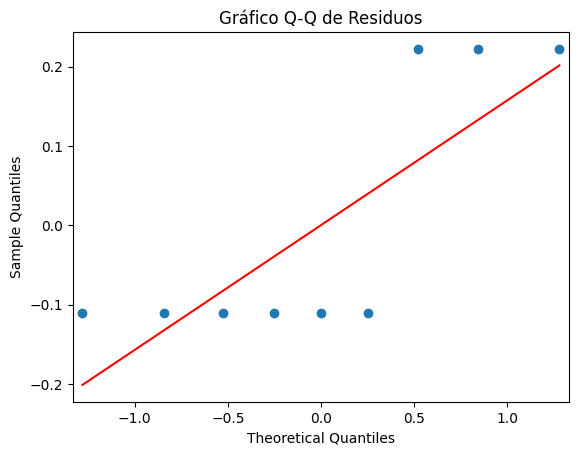


Prueba de Shapiro-Wilk para normalidad de residuos: Estadístico=0.6173, p-valor=0.0002


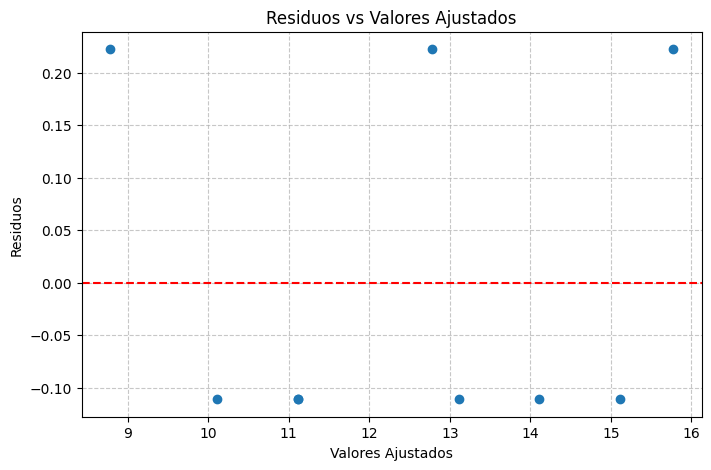


Prueba de Levene para homocedasticidad (varianzas entre Proveedores): Estadístico=0.0556, p-valor=0.9464

No se detectaron puntos aberrantes obvios en los residuos (usando método IQR).




In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



data_rows = [
    # Inspector I
    {'Inspector': 'I', 'Escala': 1, 'Proveedor': 'A', 'Peso': 16},
    {'Inspector': 'I', 'Escala': 2, 'Proveedor': 'B', 'Peso': 10},
    {'Inspector': 'I', 'Escala': 3, 'Proveedor': 'C', 'Peso': 11},

    # Inspector II
    {'Inspector': 'II', 'Escala': 1, 'Proveedor': 'B', 'Peso': 15},
    {'Inspector': 'II', 'Escala': 2, 'Proveedor': 'C', 'Peso': 9},
    {'Inspector': 'II', 'Escala': 3, 'Proveedor': 'A', 'Peso': 14},

    # Inspector III
    {'Inspector': 'III', 'Escala': 1, 'Proveedor': 'C', 'Peso': 13},
    {'Inspector': 'III', 'Escala': 2, 'Proveedor': 'A', 'Peso': 11},
    {'Inspector': 'III', 'Escala': 3, 'Proveedor': 'B', 'Peso': 13},
]

df = pd.DataFrame(data_rows)


df['Inspector'] = df['Inspector'].astype('category')
df['Escala'] = df['Escala'].astype('category')
df['Proveedor'] = df['Proveedor'].astype('category')

print("--- Datos del Experimento ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")

alpha = 0.05


model_cuadro_latino = ols('Peso ~ C(Inspector) + C(Escala) + C(Proveedor)', data=df).fit()


anova_table_cuadro_latino = sm.stats.anova_lm(model_cuadro_latino, typ=2)



print("--- a) Diferencias entre Proveedores ---")

p_value_proveedor = anova_table_cuadro_latino['PR(>F)'][2]

print("\nTabla ANOVA del Cuadro Latino:")
print(anova_table_cuadro_latino)
print(f"\nP-valor para el efecto del Proveedor: {p_value_proveedor:.4f}")


if p_value_proveedor < alpha:
    print("\nRealizando pruebas post-hoc (Tukey HSD) para Proveedor:")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result_proveedor = pairwise_tukeyhsd(endog=df['Peso'], groups=df['Proveedor'], alpha=alpha)
    print(tukey_result_proveedor)
else:
    print("\nEl factor Proveedor NO es estadísticamente significativo. No se realizan pruebas post-hoc.")
print("\n")



print("--- b) Diferencias entre Inspectores y Escalas ---")

p_value_inspector = anova_table_cuadro_latino['PR(>F)'][0]
p_value_escala = anova_table_cuadro_latino['PR(>F)'][1]

print("\nTabla ANOVA del Cuadro Latino (para referencia):")
print(anova_table_cuadro_latino)
print(f"\nP-valor para el efecto del Inspector: {p_value_inspector:.4f}")
print(f"P-valor para el efecto de la Escala: {p_value_escala:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")
print("\n")



print("--- c) Mejor Proveedor si el Peso debe ser 15 g ---")


mean_peso_by_proveedor = df.groupby('Proveedor')['Peso'].mean().sort_values(ascending=False)

print("\nPeso Medio por Proveedor:")
print(mean_peso_by_proveedor)


target_weight = 15
distances_from_target = abs(mean_peso_by_proveedor - target_weight)
best_supplier_for_target = distances_from_target.idxmin()

print(f"\nEl proveedor con el peso promedio más cercano a {target_weight} g es: {best_supplier_for_target}")
print("\n")



print("--- d) Re-análisis si algún factor de bloque no es significativo ---")


nonsig_blocks = []
if p_value_inspector >= alpha:
    nonsig_blocks.append('Inspector')
if p_value_escala >= alpha:
    nonsig_blocks.append('Escala')

if nonsig_blocks:
    print(f"\nFactores de bloque no significativos (p >= {alpha}): {nonsig_blocks}")


    formula_new = 'Peso ~ C(Proveedor)'
    if 'Inspector' not in nonsig_blocks:
        formula_new += ' + C(Inspector)'
    if 'Escala' not in nonsig_blocks:
        formula_new += ' + C(Escala)'

    print(f"\nNueva fórmula del modelo: {formula_new}")
    model_reduced = ols(formula_new, data=df).fit()
    anova_table_reduced = sm.stats.anova_lm(model_reduced, typ=2)

    print("\nTabla ANOVA del Modelo Reducido:")
    print(anova_table_reduced)


    if 'C(Proveedor)' in anova_table_reduced.index:
        p_value_proveedor_reduced = anova_table_reduced.loc['C(Proveedor)', 'PR(>F)']
        print(f"\nP-valor para el efecto del Proveedor en el modelo reducido: {p_value_proveedor_reduced:.4f}")
        if p_value_proveedor_reduced < alpha:
            print("\nRealizando pruebas post-hoc (Tukey HSD) para Proveedor en el modelo reducido:")
            from statsmodels.stats.multicomp import pairwise_tukeyhsd
            tukey_result_reduced = pairwise_tukeyhsd(endog=df['Peso'], groups=df['Proveedor'], alpha=alpha)
            print(tukey_result_reduced)
        else:
            print("\nEl factor Proveedor NO es estadísticamente significativo en el modelo reducido. No se realizan pruebas post-hoc.")
    else:
        print("\nEl factor Proveedor no está presente en el modelo reducido.")
else:
    print("\nNingún factor de bloque es no significativo. No se realiza ningún re-análisis.")
print("\n")


print("--- e) Verificación de Supuestos del Modelo (Modelo de Cuadro Latino Principal) ---")


residuals = model_cuadro_latino.resid
fig_qq = sm.qqplot(residuals, line='s')
plt.title('Gráfico Q-Q de Residuos')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f"\nPrueba de Shapiro-Wilk para normalidad de residuos: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")


plt.figure(figsize=(8, 5))
plt.scatter(model_cuadro_latino.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


levene_test_proveedor = stats.levene(df['Peso'][df['Proveedor'] == 'A'],
                                    df['Peso'][df['Proveedor'] == 'B'],
                                    df['Peso'][df['Proveedor'] == 'C'],
                                    center='median')
print(f"\nPrueba de Levene para homocedasticidad (varianzas entre Proveedores): Estadístico={levene_test_proveedor.statistic:.4f}, p-valor={levene_test_proveedor.pvalue:.4f}")


Q1, Q3 = np.percentile(residuals, [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_resid = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

if not outliers_resid.empty:
    print("\nPosibles puntos aberrantes en los residuos (usando método IQR):")
    print(outliers_resid)
else:
    print("\nNo se detectaron puntos aberrantes obvios en los residuos (usando método IQR).")
print("\n")

# Karla María Macías Chávez

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


--- Datos del Experimento ---
  Ren Col  Rendimiento Variedad
0   1   1        1.640        B
1   1   2        1.210        D
2   1   3        1.425        C
3   1   4        1.345        A
4   2   1        1.475        C
Número total de observaciones: 16


--- a) Análisis de Varianza (ANOVA) para Diferencias en Variedades ---

Tabla ANOVA del Cuadro Latino:
               sum_sq   df          F    PR(>F)
C(Ren)       0.030155  3.0   0.465406  0.716972
C(Col)       0.827342  3.0  12.769166  0.005148
C(Variedad)  0.426842  3.0   6.587865  0.025092
Residual     0.129584  6.0        NaN       NaN


--- b) Factores de Bloque con Efectos ---

P-valor para el factor de bloque 'Ren' (Fila): 0.7170
P-valor para el factor de bloque 'Col' (Columna): 0.0051
Nivel de significancia (alfa): 0.05


--- c) Comparación con Diseño Completamente Aleatorizado (DCA) ---

Tabla ANOVA (Diseño Completamente Aleatorizado - solo Variedad):
               sum_sq    df         F    PR(>F)
C(Variedad)  0.426842   

<ipython-input-4-21fd3b5d720d>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_ren = anova_table_cuadro_latino['PR(>F)'][0]
<ipython-input-4-21fd3b5d720d>:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_col = anova_table_cuadro_latino['PR(>F)'][1]
<ipython-input-4-21fd3b5d720d>:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_variedad_dca = anova_table_dca['PR(>F)'][0]
<ipython-input-4-21fd3b5d720d>:88: 

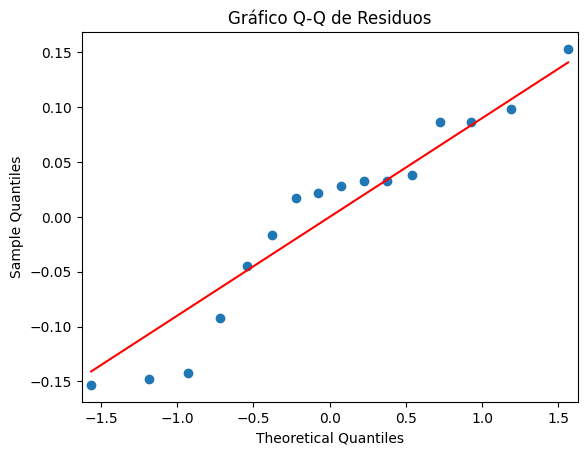


Prueba de Shapiro-Wilk para normalidad de residuos: Estadístico=0.9250, p-valor=0.2026


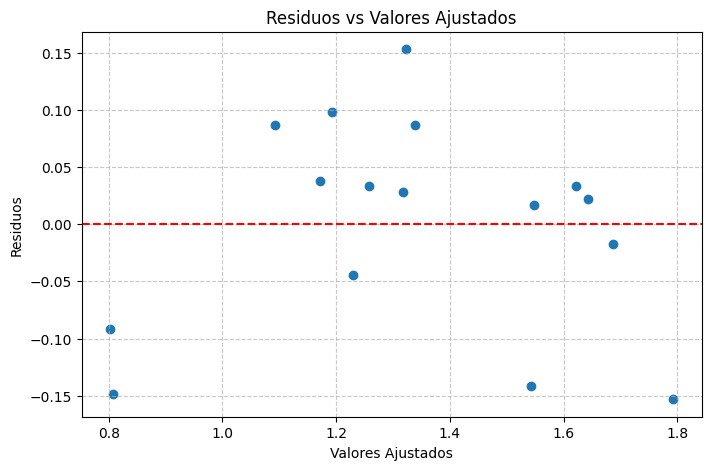


Prueba de Levene para homocedasticidad (varianzas entre Variedades): Estadístico=13.6839, p-valor=0.0004

No se detectaron puntos aberrantes obvios en los residuos (usando método IQR).


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



data_rows = [
    # Fila 1
    {'Ren': 1, 'Col': 1, 'Rendimiento': 1.640, 'Variedad': 'B'},
    {'Ren': 1, 'Col': 2, 'Rendimiento': 1.210, 'Variedad': 'D'},
    {'Ren': 1, 'Col': 3, 'Rendimiento': 1.425, 'Variedad': 'C'},
    {'Ren': 1, 'Col': 4, 'Rendimiento': 1.345, 'Variedad': 'A'},
    # Fila 2
    {'Ren': 2, 'Col': 1, 'Rendimiento': 1.475, 'Variedad': 'C'},
    {'Ren': 2, 'Col': 2, 'Rendimiento': 1.185, 'Variedad': 'A'},
    {'Ren': 2, 'Col': 3, 'Rendimiento': 1.400, 'Variedad': 'D'},
    {'Ren': 2, 'Col': 4, 'Rendimiento': 1.290, 'Variedad': 'B'},
    # Fila 3
    {'Ren': 3, 'Col': 1, 'Rendimiento': 1.670, 'Variedad': 'A'},
    {'Ren': 3, 'Col': 2, 'Rendimiento': 0.710, 'Variedad': 'C'},
    {'Ren': 3, 'Col': 3, 'Rendimiento': 1.665, 'Variedad': 'B'},
    {'Ren': 3, 'Col': 4, 'Rendimiento': 1.180, 'Variedad': 'D'},
    # Fila 4
    {'Ren': 4, 'Col': 1, 'Rendimiento': 1.565, 'Variedad': 'D'},
    {'Ren': 4, 'Col': 2, 'Rendimiento': 1.290, 'Variedad': 'B'},
    {'Ren': 4, 'Col': 3, 'Rendimiento': 1.655, 'Variedad': 'A'},
    {'Ren': 4, 'Col': 4, 'Rendimiento': 0.660, 'Variedad': 'C'},
]

df = pd.DataFrame(data_rows)


df['Ren'] = df['Ren'].astype('category')
df['Col'] = df['Col'].astype('category')
df['Variedad'] = df['Variedad'].astype('category')

print("--- Datos del Experimento ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")



print("--- a) Análisis de Varianza (ANOVA) para Diferencias en Variedades ---")


model_cuadro_latino = ols('Rendimiento ~ C(Ren) + C(Col) + C(Variedad)', data=df).fit()


anova_table_cuadro_latino = sm.stats.anova_lm(model_cuadro_latino, typ=2)

print("\nTabla ANOVA del Cuadro Latino:")
print(anova_table_cuadro_latino)
print("\n")



print("--- b) Factores de Bloque con Efectos ---")

alpha = 0.05

p_value_ren = anova_table_cuadro_latino['PR(>F)'][0]
p_value_col = anova_table_cuadro_latino['PR(>F)'][1]

print(f"\nP-valor para el factor de bloque 'Ren' (Fila): {p_value_ren:.4f}")
print(f"P-valor para el factor de bloque 'Col' (Columna): {p_value_col:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")

print("\n")



print("--- c) Comparación con Diseño Completamente Aleatorizado (DCA) ---")


model_dca = ols('Rendimiento ~ C(Variedad)', data=df).fit()
anova_table_dca = sm.stats.anova_lm(model_dca, typ=2)

print("\nTabla ANOVA (Diseño Completamente Aleatorizado - solo Variedad):")
print(anova_table_dca)

p_value_variedad_dca = anova_table_dca['PR(>F)'][0]
print(f"\nP-valor para el factor Variedad en el modelo DCA: {p_value_variedad_dca:.4f}")
print(f"P-valor para el factor Variedad en el modelo de Cuadro Latino: {anova_table_cuadro_latino['PR(>F)'][2]:.4f}") # Variedad es el tercer factor en el modelo


print("\n")



print("--- d) Comparación con Diseño de Bloques Completos Aleatorizados (DBCA) ---")



model_dbca_ren = ols('Rendimiento ~ C(Variedad) + C(Ren)', data=df).fit()
anova_table_dbca_ren = sm.stats.anova_lm(model_dbca_ren, typ=2)
print("\nTabla ANOVA (DBCA - Bloqueando por Fila):")
print(anova_table_dbca_ren)
p_value_variedad_dbca_ren = anova_table_dbca_ren['PR(>F)'][0]
print(f"\nP-valor para el factor Variedad en el modelo DBCA (Fila): {p_value_variedad_dbca_ren:.4f}")


model_dbca_col = ols('Rendimiento ~ C(Variedad) + C(Col)', data=df).fit()
anova_table_dbca_col = sm.stats.anova_lm(model_dbca_col, typ=2)
print("\nTabla ANOVA (DBCA - Bloqueando por Columna):")
print(anova_table_dbca_col)
p_value_variedad_dbca_col = anova_table_dbca_col['PR(>F)'][0]
print(f"\nP-valor para el factor Variedad en el modelo DBCA (Columna): {p_value_variedad_dbca_col:.4f}")

print("\n")



print("--- e) Verificación de Supuestos del Modelo (Modelo de Cuadro Latino) ---")
alpha = 0.05


residuals = model_cuadro_latino.resid
fig_qq = sm.qqplot(residuals, line='s')
plt.title('Gráfico Q-Q de Residuos')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f"\nPrueba de Shapiro-Wilk para normalidad de residuos: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")


plt.figure(figsize=(8, 5))
plt.scatter(model_cuadro_latino.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


levene_test_variedad = stats.levene(df['Rendimiento'][df['Variedad'] == 'A'],
                                    df['Rendimiento'][df['Variedad'] == 'B'],
                                    df['Rendimiento'][df['Variedad'] == 'C'],
                                    df['Rendimiento'][df['Variedad'] == 'D'],
                                    center='median')
print(f"\nPrueba de Levene para homocedasticidad (varianzas entre Variedades): Estadístico={levene_test_variedad.statistic:.4f}, p-valor={levene_test_variedad.pvalue:.4f}")


Q1, Q3 = np.percentile(residuals, [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_resid = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

if not outliers_resid.empty:
    print("\nPosibles puntos aberrantes en los residuos (usando método IQR):")
    print(outliers_resid)
else:
    print("\nNo se detectaron puntos aberrantes obvios en los residuos (usando método IQR).")

    # Karla María Macías Chávez

## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


--- Datos del Experimento ---
  Apetito_PesoInicial Dieta  Peso_Ganado
0                  P1     C           67
1                  P1     C           72
2                  P1     A          105
3                  P1     A          112
4                  P1     B           95
Número total de observaciones: 18


--- a) Análisis de Datos (ANOVA Factorial) ---

Tabla ANOVA Factorial:
                                      sum_sq   df          F    PR(>F)
C(Apetito_PesoInicial)            116.333333  2.0   0.549318  0.595537
C(Dieta)                         3216.000000  2.0  15.185729  0.001305
C(Apetito_PesoInicial):C(Dieta)  2498.666667  4.0   5.899265  0.013000
Residual                          953.000000  9.0        NaN       NaN


--- b) Mejor Dieta ---

Peso Ganado Medio por Dieta (Ordenado de Mayor a Menor):
Dieta
A    104.666667
C     82.666667
B     72.666667
Name: Peso_Ganado, dtype: float64

La dieta con mayor peso ganado promedio es: A


--- c) Factores de Bloque (Apetito/Peso In

<ipython-input-3-0d6023f3ca97>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_weight_gain_by_diet = df.groupby('Dieta')['Peso_Ganado'].mean().sort_values(ascending=False)
<ipython-input-3-0d6023f3ca97>:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_apetito = anova_table_factorial['PR(>F)'][0]
<ipython-input-3-0d6023f3ca97>:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_diet_dca = anova_table_dca_die

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B    -32.0 0.0071 -55.129 -8.871   True
     A      C    -22.0 0.0634 -45.129  1.129  False
     B      C     10.0 0.5152 -13.129 33.129  False
---------------------------------------------------


--- e) Verificación de Supuestos del Modelo (Modelo Factorial Principal) ---


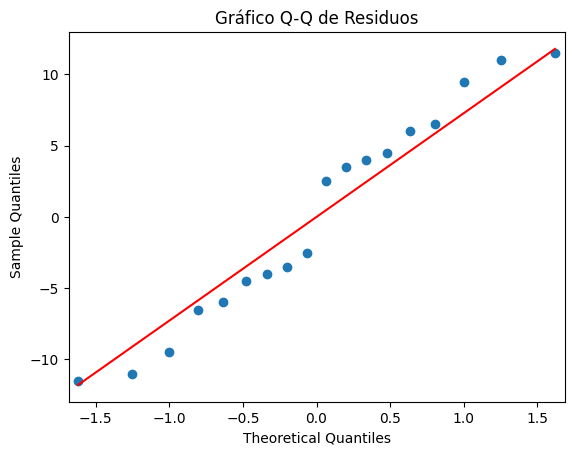


Prueba de Shapiro-Wilk para normalidad de residuos: Estadístico=0.9418, p-valor=0.3111


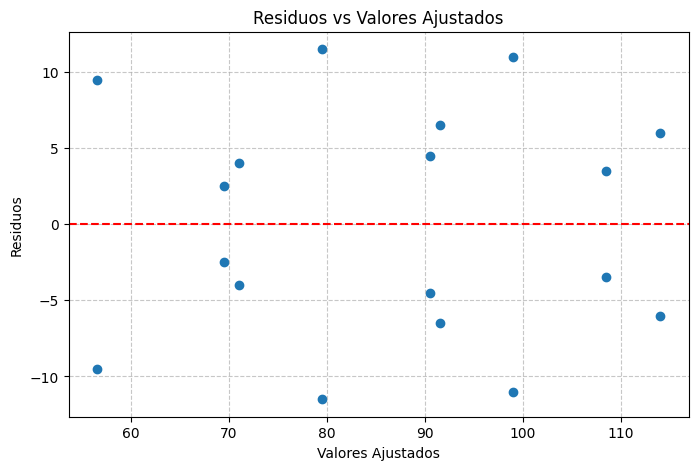


Prueba de Levene para homocedasticidad (varianzas entre Dietas): Estadístico=0.5658, p-valor=0.5796
Prueba de Levene para homocedasticidad (varianzas entre grupos de Apetito/Peso Inicial): Estadístico=2.0856, p-valor=0.1588

No se detectaron puntos aberrantes obvios en los residuos (usando método IQR).


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



data = {
    'Apetito_PesoInicial': ['P1', 'P1', 'P1', 'P1', 'P1', 'P1',
                            'P2', 'P2', 'P2', 'P2', 'P2', 'P2',
                            'P3', 'P3', 'P3', 'P3', 'P3', 'P3'],
    'Dieta': ['C', 'C', 'A', 'A', 'B', 'B',
              'A', 'A', 'B', 'B', 'C', 'C',
              'B', 'B', 'C', 'C', 'A', 'A'],
    'Peso_Ganado': [67, 72, 105, 112, 95, 86,
                    85, 98, 75, 67, 88, 110,
                    66, 47, 68, 91, 108, 120]
}

df = pd.DataFrame(data)


df['Apetito_PesoInicial'] = df['Apetito_PesoInicial'].astype('category')
df['Dieta'] = df['Dieta'].astype('category')

print("--- Datos del Experimento ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")



print("--- a) Análisis de Datos (ANOVA Factorial) ---")



model_factorial = ols('Peso_Ganado ~ C(Apetito_PesoInicial) * C(Dieta)', data=df).fit()


anova_table_factorial = sm.stats.anova_lm(model_factorial, typ=2)

print("\nTabla ANOVA Factorial:")
print(anova_table_factorial)
print("\n")



print("--- b) Mejor Dieta ---")


mean_weight_gain_by_diet = df.groupby('Dieta')['Peso_Ganado'].mean().sort_values(ascending=False)

print("\nPeso Ganado Medio por Dieta (Ordenado de Mayor a Menor):")
print(mean_weight_gain_by_diet)

best_diet = mean_weight_gain_by_diet.index[0]
print(f"\nLa dieta con mayor peso ganado promedio es: {best_diet}")
print("\n")



print("--- c) Factores de Bloque (Apetito/Peso Inicial) ---")


alpha = 0.05
p_value_apetito = anova_table_factorial['PR(>F)'][0]
print(f"El p-valor para el factor Apetito/Peso Inicial es: {p_value_apetito:.4f}")


print("\n")


print("--- d) Re-análisis si se ignora un factor ---")


if p_value_apetito >= alpha:
    print("\nEl factor Apetito/Peso Inicial no es significativo. Re-analizando el experimento como un DCA (solo Dieta).")

    model_dca_diet = ols('Peso_Ganado ~ C(Dieta)', data=df).fit()
    anova_table_dca_diet = sm.stats.anova_lm(model_dca_diet, typ=2)

    print("\nTabla ANOVA (DCA - solo Dieta):")
    print(anova_table_dca_diet)

    p_value_diet_dca = anova_table_dca_diet['PR(>F)'][0]
    print(f"\nP-valor para el factor Dieta en el modelo DCA: {p_value_diet_dca:.4f}")


    if p_value_diet_dca < alpha:
        print("\nRealizando pruebas post-hoc para Dieta (Tukey HSD) en el modelo DCA:")
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        tukey_diet_dca = pairwise_tukeyhsd(endog=df['Peso_Ganado'], groups=df['Dieta'], alpha=alpha)
        print(tukey_diet_dca)
else:
    print("\nEl factor Apetito/Peso Inicial es significativo. No se procede con el re-análisis ignorándolo, ya que es un factor importante.")

print("\n")



print("--- e) Verificación de Supuestos del Modelo (Modelo Factorial Principal) ---")


residuals = model_factorial.resid
fig_qq = sm.qqplot(residuals, line='s')
plt.title('Gráfico Q-Q de Residuos')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f"\nPrueba de Shapiro-Wilk para normalidad de residuos: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")



plt.figure(figsize=(8, 5))
plt.scatter(model_factorial.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


levene_test_dieta = stats.levene(df['Peso_Ganado'][df['Dieta'] == 'A'],
                                 df['Peso_Ganado'][df['Dieta'] == 'B'],
                                 df['Peso_Ganado'][df['Dieta'] == 'C'],
                                 center='median')
print(f"\nPrueba de Levene para homocedasticidad (varianzas entre Dietas): Estadístico={levene_test_dieta.statistic:.4f}, p-valor={levene_test_dieta.pvalue:.4f}")


levene_test_apetito = stats.levene(df['Peso_Ganado'][df['Apetito_PesoInicial'] == 'P1'],
                                   df['Peso_Ganado'][df['Apetito_PesoInicial'] == 'P2'],
                                   df['Peso_Ganado'][df['Apetito_PesoInicial'] == 'P3'],
                                   center='median')
print(f"Prueba de Levene para homocedasticidad (varianzas entre grupos de Apetito/Peso Inicial): Estadístico={levene_test_apetito.statistic:.4f}, p-valor={levene_test_apetito.pvalue:.4f}")


Q1, Q3 = np.percentile(residuals, [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_resid = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

if not outliers_resid.empty:
    print("\nPosibles puntos aberrantes en los residuos (usando método IQR):")
    print(outliers_resid)
else:
    print("\nNo se detectaron puntos aberrantes obvios en los residuos (usando método IQR).")

    # Karla María Macías Chávez

## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


--- Datos del Experimento ---
   Chofer        Dia  Costo Ruta Marca
0  Carlos      Lunes    825    D     α
1  Carlos      Lunes    750    D     α
2  Carlos     Martes    585    C     χ
3  Carlos     Martes    610    C     χ
4  Carlos  Miércoles    550    B     β
Número total de observaciones: 32


--- a) Análisis de Varianza (ANOVA) ---

Tabla ANOVA del Cuadro Grecolatino:
                 sum_sq    df          F        PR(>F)
C(Chofer)    9946.09375   3.0   1.528380  2.395414e-01
C(Dia)      14558.59375   3.0   2.237166  1.169997e-01
C(Ruta)    198252.34375   3.0  30.464708  1.825076e-07
C(Marca)    29071.09375   3.0   4.467248  1.551834e-02
Residual    41214.84375  19.0        NaN           NaN


--- b) Pruebas de Comparaciones Múltiples (Post-Hoc) ---

El factor 'Chofer' NO es significativo (p-valor=0.2395). No se realizan pruebas post-hoc.

El factor 'Dia' NO es significativo (p-valor=0.1170). No se realizan pruebas post-hoc.

El factor 'Ruta' es significativo (p-valor=0.0000). Re

<ipython-input-32-c4d078ebb5e2>:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table_grecolatino['PR(>F)'][i]


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B  -108.75 0.0044 -188.1802 -29.3198   True
     A      C    16.25 0.9434  -63.1802  95.6802  False
     A      D  113.125  0.003   33.6948 192.5552   True
     B      C    125.0  0.001   45.5698 204.4302   True
     B      D  221.875    0.0  142.4448 301.3052   True
     C      D   96.875 0.0123   17.4448 176.3052   True
-------------------------------------------------------

El factor 'Marca' es significativo (p-valor=0.0155). Realizando prueba post-hoc (Tukey HSD):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     α      β    18.75   0.98 -113.8007 151.3007  False
     α      δ    -57.5 0.6415 -190.0507  75.0507  False
     α      χ  -38.125 0.8605 -170.6757  94.4257  False
     β    

<ipython-input-32-c4d078ebb5e2>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ruta', y='Costo', data=df, errorbar='se', palette='viridis')
<ipython-input-32-c4d078ebb5e2>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chofer', y='Costo', data=df, errorbar='se', palette='viridis')
<ipython-input-32-c4d078ebb5e2>:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia', y='Costo', data=df, errorbar='se', palette='viridis')
<ipython-input-32-c4d078ebb5e2>:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

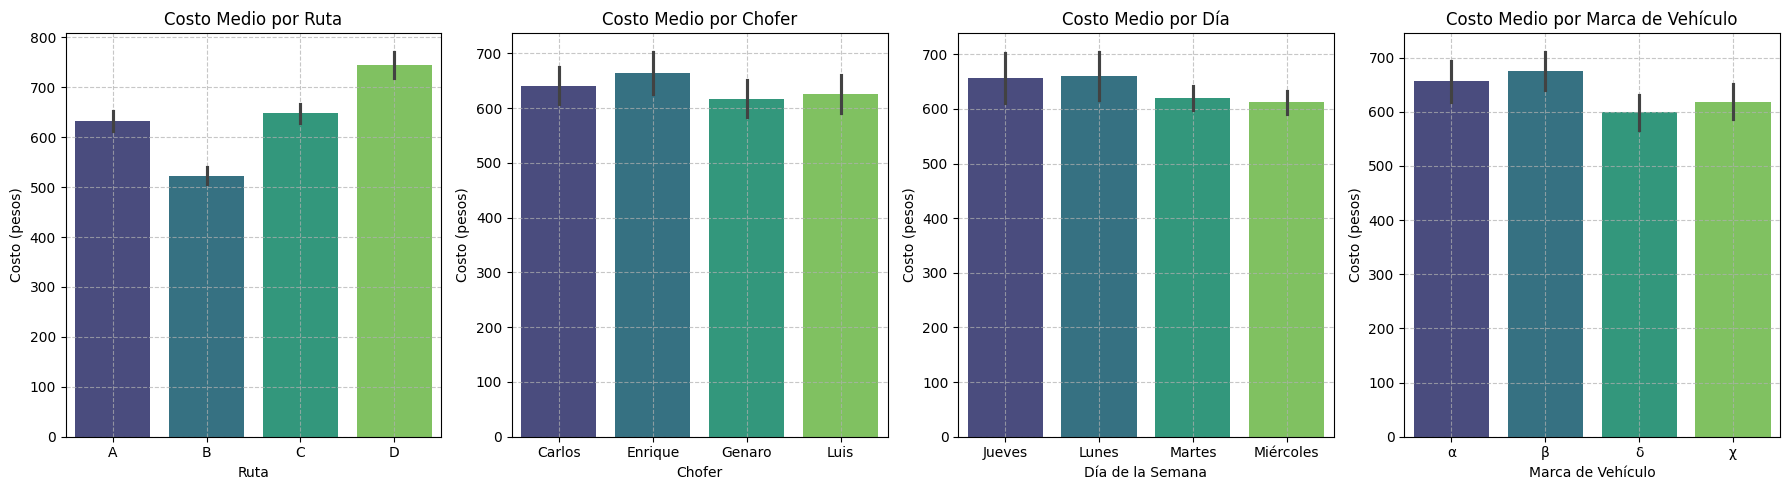

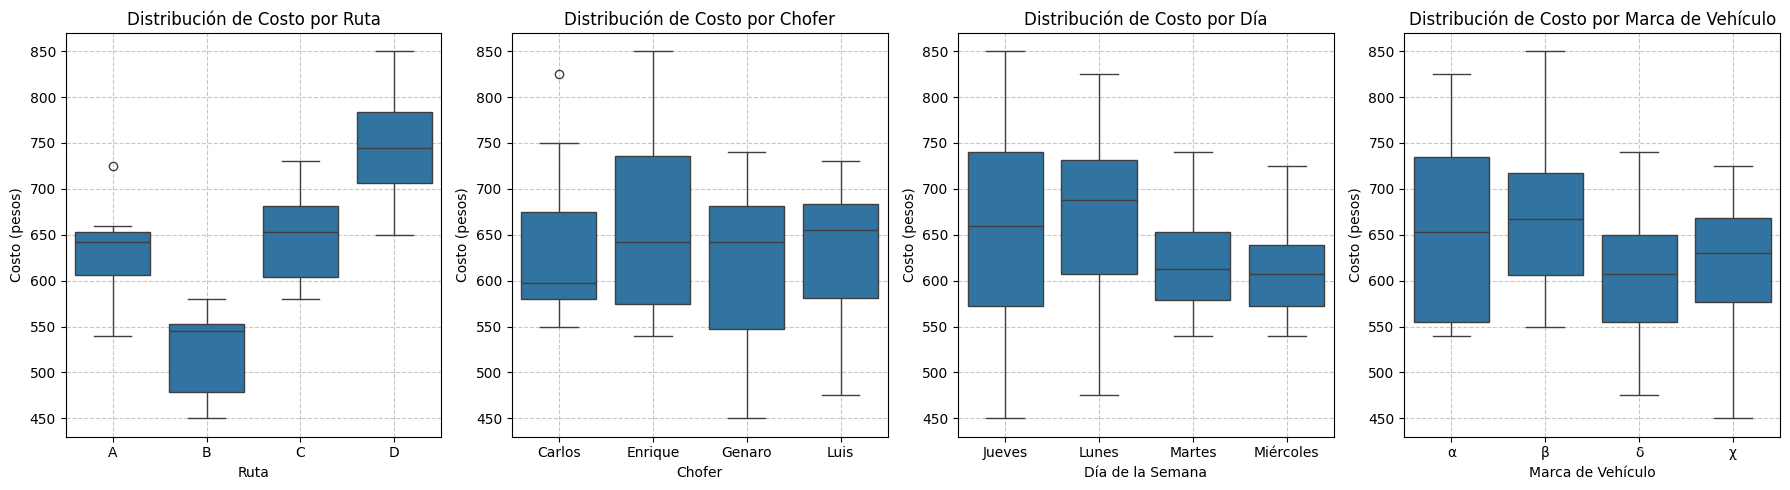



--- d) Mejor y Peor Ruta ---

Costos Medios por Ruta (Ordenados):
Ruta
B    523.125
A    631.875
C    648.125
D    745.000
Name: Costo, dtype: float64

La mejor ruta (menor costo promedio) es: B
La peor ruta (mayor costo promedio) es: D


--- e) Diferencias significativas entre Choferes y Marcas de Unidad ---

Tabla ANOVA para referencia:
                 sum_sq    df          F        PR(>F)
C(Chofer)    9946.09375   3.0   1.528380  2.395414e-01
C(Dia)      14558.59375   3.0   2.237166  1.169997e-01
C(Ruta)    198252.34375   3.0  30.464708  1.825076e-07
C(Marca)    29071.09375   3.0   4.467248  1.551834e-02
Residual    41214.84375  19.0        NaN           NaN

Para los Choferes (p-valor): 0.2395
Para el Tipo o Marca de Unidad (p-valor): 0.0155
Nivel de significancia (alfa): 0.05


--- f) Factores de Bloque Valiosos ---

P-valores para los factores de bloqueo:
Chofer: 0.2395
Día de la Semana: 0.1170
Marca de Vehículo: 0.0155
Nivel de significancia (alfa): 0.05


--- g) Razón para e

<ipython-input-32-c4d078ebb5e2>:184: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_costs_by_route = df.groupby('Ruta')['Costo'].mean().sort_values()
<ipython-input-32-c4d078ebb5e2>:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_chofer = anova_table_grecolatino['PR(>F)'][0]
<ipython-input-32-c4d078ebb5e2>:206: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_marca = anova_table_grecolatino['PR(>F)'][3]
<ipyt

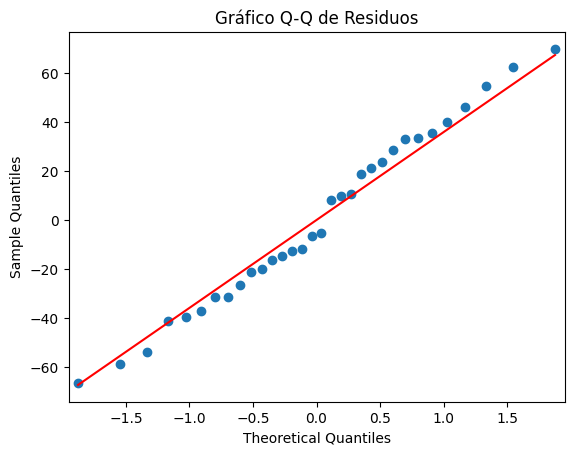


Prueba de Shapiro-Wilk para normalidad de residuos: Estadístico=0.9767, p-valor=0.6988


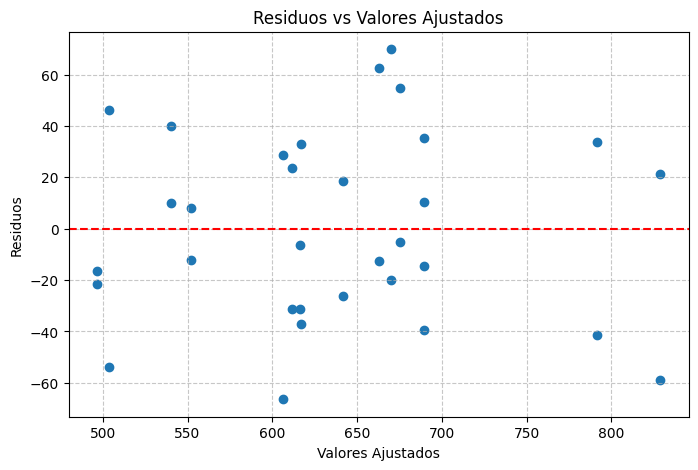


Prueba de Levene para homocedasticidad (varianzas entre Rutas): Estadístico=0.3462, p-valor=0.7921
Prueba de Levene para homocedasticidad (varianzas entre Choferes): Estadístico=0.0956, p-valor=0.9618

No se detectaron puntos aberrantes obvios en los residuos (usando método IQR).


In [ ]:


import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


data_rows = [
    # Carlos
    {'Chofer': 'Carlos', 'Dia': 'Lunes', 'Costo': 825, 'Ruta': 'D', 'Marca': 'α'},
    {'Chofer': 'Carlos', 'Dia': 'Lunes', 'Costo': 750, 'Ruta': 'D', 'Marca': 'α'},
    {'Chofer': 'Carlos', 'Dia': 'Martes', 'Costo': 585, 'Ruta': 'C', 'Marca': 'χ'},
    {'Chofer': 'Carlos', 'Dia': 'Martes', 'Costo': 610, 'Ruta': 'C', 'Marca': 'χ'},
    {'Chofer': 'Carlos', 'Dia': 'Miércoles', 'Costo': 550, 'Ruta': 'B', 'Marca': 'β'},
    {'Chofer': 'Carlos', 'Dia': 'Miércoles', 'Costo': 580, 'Ruta': 'B', 'Marca': 'β'},
    {'Chofer': 'Carlos', 'Dia': 'Jueves', 'Costo': 580, 'Ruta': 'A', 'Marca': 'δ'},
    {'Chofer': 'Carlos', 'Dia': 'Jueves', 'Costo': 650, 'Ruta': 'A', 'Marca': 'δ'},

    # Enrique
    {'Chofer': 'Enrique', 'Dia': 'Lunes', 'Costo': 650, 'Ruta': 'A', 'Marca': 'χ'},
    {'Chofer': 'Enrique', 'Dia': 'Lunes', 'Costo': 725, 'Ruta': 'A', 'Marca': 'χ'},
    {'Chofer': 'Enrique', 'Dia': 'Martes', 'Costo': 540, 'Ruta': 'B', 'Marca': 'α'},
    {'Chofer': 'Enrique', 'Dia': 'Martes', 'Costo': 560, 'Ruta': 'B', 'Marca': 'α'},
    {'Chofer': 'Enrique', 'Dia': 'Miércoles', 'Costo': 580, 'Ruta': 'C', 'Marca': 'δ'},
    {'Chofer': 'Enrique', 'Dia': 'Miércoles', 'Costo': 635, 'Ruta': 'C', 'Marca': 'δ'},
    {'Chofer': 'Enrique', 'Dia': 'Jueves', 'Costo': 850, 'Ruta': 'D', 'Marca': 'β'},
    {'Chofer': 'Enrique', 'Dia': 'Jueves', 'Costo': 770, 'Ruta': 'D', 'Marca': 'β'},

    # Genaro
    {'Chofer': 'Genaro', 'Dia': 'Lunes', 'Costo': 700, 'Ruta': 'C', 'Marca': 'β'},
    {'Chofer': 'Genaro', 'Dia': 'Lunes', 'Costo': 675, 'Ruta': 'C', 'Marca': 'β'},
    {'Chofer': 'Genaro', 'Dia': 'Martes', 'Costo': 650, 'Ruta': 'D', 'Marca': 'δ'},
    {'Chofer': 'Genaro', 'Dia': 'Martes', 'Costo': 740, 'Ruta': 'D', 'Marca': 'δ'},
    {'Chofer': 'Genaro', 'Dia': 'Miércoles', 'Costo': 635, 'Ruta': 'A', 'Marca': 'α'},
    {'Chofer': 'Genaro', 'Dia': 'Miércoles', 'Costo': 540, 'Ruta': 'A', 'Marca': 'α'},
    {'Chofer': 'Genaro', 'Dia': 'Jueves', 'Costo': 450, 'Ruta': 'B', 'Marca': 'χ'},
    {'Chofer': 'Genaro', 'Dia': 'Jueves', 'Costo': 550, 'Ruta': 'B', 'Marca': 'χ'},

    # Luis
    {'Chofer': 'Luis', 'Dia': 'Lunes', 'Costo': 475, 'Ruta': 'B', 'Marca': 'δ'},
    {'Chofer': 'Luis', 'Dia': 'Lunes', 'Costo': 480, 'Ruta': 'B', 'Marca': 'δ'},
    {'Chofer': 'Luis', 'Dia': 'Martes', 'Costo': 660, 'Ruta': 'A', 'Marca': 'β'},
    {'Chofer': 'Luis', 'Dia': 'Martes', 'Costo': 615, 'Ruta': 'A', 'Marca': 'β'},
    {'Chofer': 'Luis', 'Dia': 'Miércoles', 'Costo': 650, 'Ruta': 'D', 'Marca': 'χ'},
    {'Chofer': 'Luis', 'Dia': 'Miércoles', 'Costo': 725, 'Ruta': 'D', 'Marca': 'χ'},
    {'Chofer': 'Luis', 'Dia': 'Jueves', 'Costo': 670, 'Ruta': 'C', 'Marca': 'α'},
    {'Chofer': 'Luis', 'Dia': 'Jueves', 'Costo': 730, 'Ruta': 'C', 'Marca': 'α'},
]

df = pd.DataFrame(data_rows)

print("--- Datos del Experimento ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")


df['Chofer'] = df['Chofer'].astype('category')
df['Dia'] = df['Dia'].astype('category')
df['Ruta'] = df['Ruta'].astype('category')
df['Marca'] = df['Marca'].astype('category')


print("--- a) Análisis de Varianza (ANOVA) ---")


model_grecolatino = ols('Costo ~ C(Chofer) + C(Dia) + C(Ruta) + C(Marca)', data=df).fit()


anova_table_grecolatino = sm.stats.anova_lm(model_grecolatino, typ=2)

print("\nTabla ANOVA del Cuadro Grecolatino:")
print(anova_table_grecolatino)
print("\n")


print("--- b) Pruebas de Comparaciones Múltiples (Post-Hoc) ---")
alpha = 0.05


factores = ['C(Chofer)', 'C(Dia)', 'C(Ruta)', 'C(Marca)']
original_factors = ['Chofer', 'Dia', 'Ruta', 'Marca']

for i, factor_col in enumerate(factores):
    p_value = anova_table_grecolatino['PR(>F)'][i]
    if p_value < alpha:
        print(f"\nEl factor '{original_factors[i]}' es significativo (p-valor={p_value:.4f}). Realizando prueba post-hoc (Tukey HSD):")
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        tukey_result = pairwise_tukeyhsd(endog=df['Costo'], groups=df[original_factors[i]], alpha=alpha)
        print(tukey_result)
    else:
        print(f"\nEl factor '{original_factors[i]}' NO es significativo (p-valor={p_value:.4f}). No se realizan pruebas post-hoc.")

print("\n")


print("--- c) Gráficas de Medias y Diagramas de Dispersión ---")


plt.figure(figsize=(18, 5))


plt.subplot(1, 4, 1)
sns.barplot(x='Ruta', y='Costo', data=df, errorbar='se', palette='viridis')
plt.title('Costo Medio por Ruta')
plt.xlabel('Ruta')
plt.ylabel('Costo (pesos)')
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 4, 2)
sns.barplot(x='Chofer', y='Costo', data=df, errorbar='se', palette='viridis')
plt.title('Costo Medio por Chofer')
plt.xlabel('Chofer')
plt.ylabel('Costo (pesos)')
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 4, 3)
sns.barplot(x='Dia', y='Costo', data=df, errorbar='se', palette='viridis')
plt.title('Costo Medio por Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Costo (pesos)')
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 4, 4)
sns.barplot(x='Marca', y='Costo', data=df, errorbar='se', palette='viridis')
plt.title('Costo Medio por Marca de Vehículo')
plt.xlabel('Marca de Vehículo')
plt.ylabel('Costo (pesos)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))

# Ruta
plt.subplot(1, 4, 1)
sns.boxplot(x='Ruta', y='Costo', data=df)
plt.title('Distribución de Costo por Ruta')
plt.xlabel('Ruta')
plt.ylabel('Costo (pesos)')
plt.grid(True, linestyle='--', alpha=0.7)

# Chofer
plt.subplot(1, 4, 2)
sns.boxplot(x='Chofer', y='Costo', data=df)
plt.title('Distribución de Costo por Chofer')
plt.xlabel('Chofer')
plt.ylabel('Costo (pesos)')
plt.grid(True, linestyle='--', alpha=0.7)

# Dia
plt.subplot(1, 4, 3)
sns.boxplot(x='Dia', y='Costo', data=df)
plt.title('Distribución de Costo por Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Costo (pesos)')
plt.grid(True, linestyle='--', alpha=0.7)

# Marca
plt.subplot(1, 4, 4)
sns.boxplot(x='Marca', y='Costo', data=df)
plt.title('Distribución de Costo por Marca de Vehículo')
plt.xlabel('Marca de Vehículo')
plt.ylabel('Costo (pesos)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n")



print("--- d) Mejor y Peor Ruta ---")


mean_costs_by_route = df.groupby('Ruta')['Costo'].mean().sort_values()

print("\nCostos Medios por Ruta (Ordenados):")
print(mean_costs_by_route)

best_route = mean_costs_by_route.index[0]
worst_route = mean_costs_by_route.index[-1]

print(f"\nLa mejor ruta (menor costo promedio) es: {best_route}")
print(f"La peor ruta (mayor costo promedio) es: {worst_route}")
print("\n")



print("--- e) Diferencias significativas entre Choferes y Marcas de Unidad ---")


print("\nTabla ANOVA para referencia:")
print(anova_table_grecolatino)


p_value_chofer = anova_table_grecolatino['PR(>F)'][0]
p_value_marca = anova_table_grecolatino['PR(>F)'][3]

print(f"\nPara los Choferes (p-valor): {p_value_chofer:.4f}")
print(f"Para el Tipo o Marca de Unidad (p-valor): {p_value_marca:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")


print("\n")


print("--- f) Factores de Bloque Valiosos ---")


p_value_chofer = anova_table_grecolatino['PR(>F)'][0]
p_value_dia = anova_table_grecolatino['PR(>F)'][1]
p_value_marca = anova_table_grecolatino['PR(>F)'][3]

print("\nP-valores para los factores de bloqueo:")
print(f"Chofer: {p_value_chofer:.4f}")
print(f"Día de la Semana: {p_value_dia:.4f}")
print(f"Marca de Vehículo: {p_value_marca:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")

print("\n")



print("--- g) Razón para evitar días festivos y quincenas, y otros aspectos a considerar ---")

print("Se evitaron días festivos y quincenas para minimizar la variabilidad externa y asegurar que las diferencias observadas en los costos sean atribuibles principalmente a las rutas o a los factores de bloqueo controlados en el experimento, y no a fluctuaciones atípicas del tráfico o la demanda de combustible asociadas con esos períodos.")
print("\nOtros aspectos a considerar para asegurar la validez y generalizabilidad del experimento podrían ser:")
print("- **Condiciones climáticas:** Clima extremo (lluvia, nieve) puede afectar el tráfico y el consumo de combustible. Considerar controlar o registrar las condiciones climáticas.")
print("- **Horario de las rutas:** Las rutas podrían tener diferentes costos dependiendo de la hora del día (horas pico vs. horas valle). Asegurar que las mediciones se tomen en horarios consistentes o que se consideren como un factor.")
print("- **Mantenimiento de los vehículos:** Un mantenimiento deficiente podría afectar el rendimiento del combustible. Asegurar que los vehículos estén en condiciones similares o que se realice un mantenimiento estandarizado.")
print("- **Carga de los vehículos:** Si las rutas implican transportar diferentes volúmenes o pesos de carga, esto podría afectar significativamente el costo. Controlar o registrar la carga.")
print("- **Velocidad promedio/estilo de conducción:** El estilo de conducción de los choferes puede influir en el consumo. Aunque el chofer es un bloque, la consistencia en el estilo (si es posible medirlo) podría ser un factor latente.")
print("- **Estado del tráfico en tiempo real:** Incluso fuera de días festivos, el tráfico puede variar. Podrían considerarse mediciones de tráfico en tiempo real como covariable.")
print("- **Errores de medición:** Asegurar la precisión en la medición del tiempo y el consumo de gasolina.")
print("\n")


print("--- h) Verificación de Supuestos del Modelo ---")
alpha = 0.05


residuals = model_grecolatino.resid
fig_qq = sm.qqplot(residuals, line='s')
plt.title('Gráfico Q-Q de Residuos')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f"\nPrueba de Shapiro-Wilk para normalidad de residuos: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")


plt.figure(figsize=(8, 5))
plt.scatter(model_grecolatino.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#Ruta
levene_test_ruta = stats.levene(df['Costo'][df['Ruta'] == 'A'],
                                 df['Costo'][df['Ruta'] == 'B'],
                                 df['Costo'][df['Ruta'] == 'C'],
                                 df['Costo'][df['Ruta'] == 'D'],
                                 center='median')
print(f"\nPrueba de Levene para homocedasticidad (varianzas entre Rutas): Estadístico={levene_test_ruta.statistic:.4f}, p-valor={levene_test_ruta.pvalue:.4f}")

#Chofer
levene_test_chofer = stats.levene(df['Costo'][df['Chofer'] == 'Carlos'],
                                 df['Costo'][df['Chofer'] == 'Enrique'],
                                 df['Costo'][df['Chofer'] == 'Genaro'],
                                 df['Costo'][df['Chofer'] == 'Luis'],
                                 center='median')
print(f"Prueba de Levene para homocedasticidad (varianzas entre Choferes): Estadístico={levene_test_chofer.statistic:.4f}, p-valor={levene_test_chofer.pvalue:.4f}")



Q1, Q3 = np.percentile(residuals, [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_resid = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

if not outliers_resid.empty:
    print("\nPosibles puntos aberrantes en los residuos (usando método IQR):")
    print(outliers_resid)
else:
    print("\nNo se detectaron puntos aberrantes obvios en los residuos (usando método IQR).")

    # Karla María Macías Chávez

## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


--- Datos del Experimento ---
  Vaca Periodo Tratamiento  Leche
0    1       1           A    304
1    1       2           B    350
2    1       3           D    504
3    1       4           D    417
4    1       5           E    519
Número total de observaciones: 49


--- a) Análisis del Experimento y Factores con Efecto ---

Tabla ANOVA del Cuadro Latino:
                       sum_sq    df         F    PR(>F)
C(Vaca)          27715.246981   6.0  1.023563  0.429248
C(Periodo)       15297.373966   6.0  0.564953  0.754681
C(Tratamiento)   43826.284144   6.0  1.618566  0.176449
Residual        135386.164835  30.0       NaN       NaN

P-valor para el factor 'Vaca': 0.4292
P-valor para el factor 'Periodo': 0.7547
P-valor para el factor 'Tratamiento': 0.1764
Nivel de significancia (alfa): 0.05


--- b) Gráficos de Medias ---


<ipython-input-33-f0dbb21a008c>:105: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_vaca = anova_table_cuadro_latino['PR(>F)'][0]
<ipython-input-33-f0dbb21a008c>:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_periodo = anova_table_cuadro_latino['PR(>F)'][1]
<ipython-input-33-f0dbb21a008c>:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_tratamiento = anova_table_cuadro_latino['PR(>F)'][2]
<ipython-input-

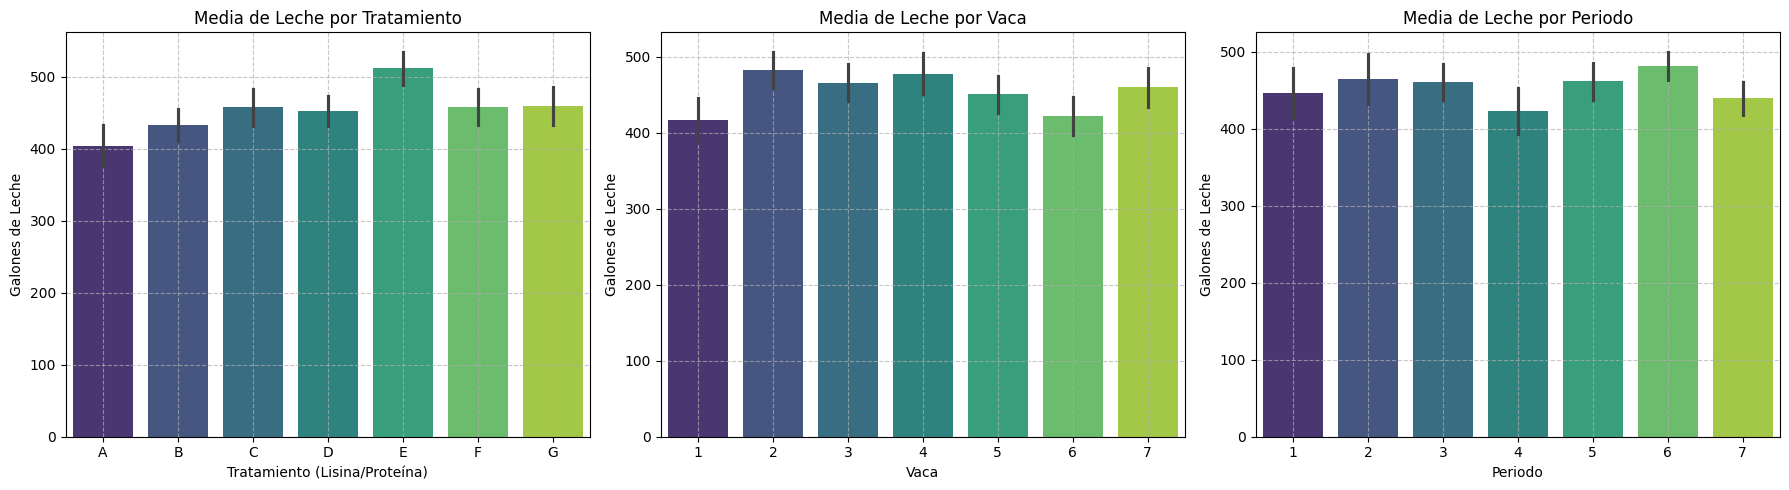



--- c) Explicación de la Falta de Efectos en Vacas y Periodo (si aplica) ---
P-valor para 'Vaca': 0.4292
P-valor para 'Periodo': 0.7547
Nivel de significancia (alfa): 0.05


--- d) Mejores Porcentajes de Lisina y Proteína (Tratamientos) ---

Producción de Leche Media por Tratamiento (Ordenada de Mayor a Menor):
Tratamiento
E    511.571429
G    459.571429
F    457.857143
C    457.666667
D    452.250000
B    433.428571
A    404.285714
Name: Leche, dtype: float64

El tratamiento (combinación de lisina/proteína) con la mayor producción de leche promedio es: E

El factor Tratamiento NO es estadísticamente significativo. La identificación del 'mejor' se basa solo en la media observada, no en una diferencia estadísticamente significativa.


--- e) Verificación de Supuestos del Modelo ---


<ipython-input-33-f0dbb21a008c>:167: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_leche_by_tratamiento = df.groupby('Tratamiento')['Leche'].mean().sort_values(ascending=False)


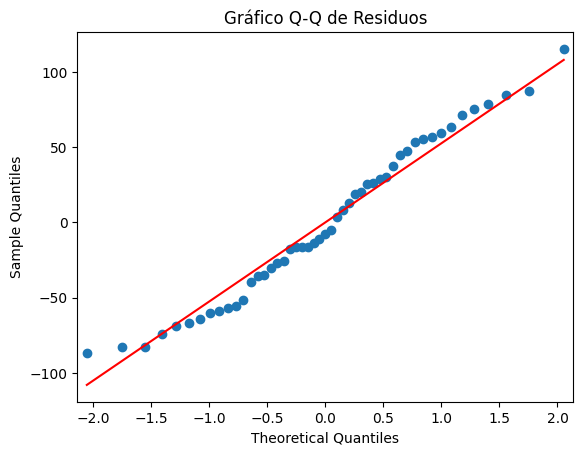


Prueba de Shapiro-Wilk para normalidad de residuos: Estadístico=0.9671, p-valor=0.1853


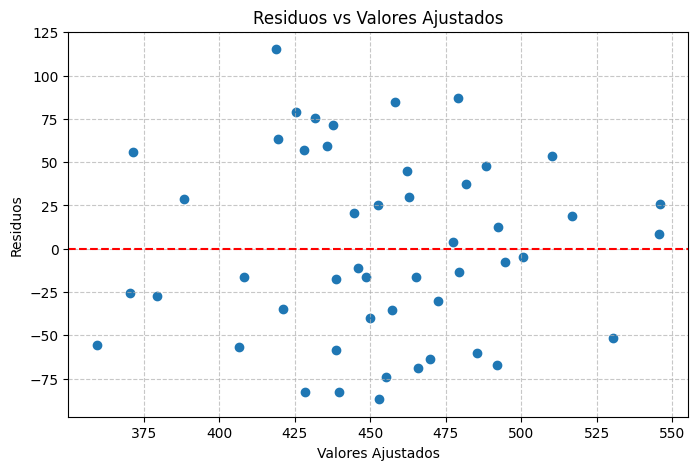


Prueba de Levene para homocedasticidad (varianzas entre Tratamientos): Estadístico=0.2776, p-valor=0.9443

No se detectaron puntos aberrantes obvios en los residuos (usando método IQR).




In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


data_rows = []

# Vaca 1
data_rows.append({'Vaca': 1, 'Periodo': 1, 'Tratamiento': 'A', 'Leche': 304})
data_rows.append({'Vaca': 1, 'Periodo': 2, 'Tratamiento': 'B', 'Leche': 350})
data_rows.append({'Vaca': 1, 'Periodo': 3, 'Tratamiento': 'D', 'Leche': 504})
data_rows.append({'Vaca': 1, 'Periodo': 4, 'Tratamiento': 'D', 'Leche': 417})
data_rows.append({'Vaca': 1, 'Periodo': 5, 'Tratamiento': 'E', 'Leche': 519})
data_rows.append({'Vaca': 1, 'Periodo': 6, 'Tratamiento': 'F', 'Leche': 432})
data_rows.append({'Vaca': 1, 'Periodo': 7, 'Tratamiento': 'G', 'Leche': 392})


# Vaca 2
data_rows.append({'Vaca': 2, 'Periodo': 1, 'Tratamiento': 'B', 'Leche': 381})
data_rows.append({'Vaca': 2, 'Periodo': 2, 'Tratamiento': 'C', 'Leche': 505})
data_rows.append({'Vaca': 2, 'Periodo': 3, 'Tratamiento': 'D', 'Leche': 425})
data_rows.append({'Vaca': 2, 'Periodo': 4, 'Tratamiento': 'E', 'Leche': 564})
data_rows.append({'Vaca': 2, 'Periodo': 5, 'Tratamiento': 'F', 'Leche': 487})
data_rows.append({'Vaca': 2, 'Periodo': 6, 'Tratamiento': 'G', 'Leche': 536})
data_rows.append({'Vaca': 2, 'Periodo': 7, 'Tratamiento': 'A', 'Leche': 483})

# Vaca 3
data_rows.append({'Vaca': 3, 'Periodo': 1, 'Tratamiento': 'C', 'Leche': 422})
data_rows.append({'Vaca': 3, 'Periodo': 2, 'Tratamiento': 'D', 'Leche': 566})
data_rows.append({'Vaca': 3, 'Periodo': 3, 'Tratamiento': 'E', 'Leche': 479})
data_rows.append({'Vaca': 3, 'Periodo': 4, 'Tratamiento': 'F', 'Leche': 357})
data_rows.append({'Vaca': 3, 'Periodo': 5, 'Tratamiento': 'G', 'Leche': 466})
data_rows.append({'Vaca': 3, 'Periodo': 6, 'Tratamiento': 'A', 'Leche': 465})
data_rows.append({'Vaca': 3, 'Periodo': 7, 'Tratamiento': 'B', 'Leche': 507})

# Vaca 4
data_rows.append({'Vaca': 4, 'Periodo': 1, 'Tratamiento': 'D', 'Leche': 442})
data_rows.append({'Vaca': 4, 'Periodo': 2, 'Tratamiento': 'E', 'Leche': 572})
data_rows.append({'Vaca': 4, 'Periodo': 3, 'Tratamiento': 'F', 'Leche': 536})
data_rows.append({'Vaca': 4, 'Periodo': 4, 'Tratamiento': 'G', 'Leche': 366})
data_rows.append({'Vaca': 4, 'Periodo': 5, 'Tratamiento': 'A', 'Leche': 495})
data_rows.append({'Vaca': 4, 'Periodo': 6, 'Tratamiento': 'B', 'Leche': 425})
data_rows.append({'Vaca': 4, 'Periodo': 7, 'Tratamiento': 'C', 'Leche': 507})

# Vaca 5
data_rows.append({'Vaca': 5, 'Periodo': 1, 'Tratamiento': 'E', 'Leche': 496})
data_rows.append({'Vaca': 5, 'Periodo': 2, 'Tratamiento': 'F', 'Leche': 449})
data_rows.append({'Vaca': 5, 'Periodo': 3, 'Tratamiento': 'G', 'Leche': 493})
data_rows.append({'Vaca': 5, 'Periodo': 4, 'Tratamiento': 'A', 'Leche': 345})
data_rows.append({'Vaca': 5, 'Periodo': 5, 'Tratamiento': 'B', 'Leche': 509})
data_rows.append({'Vaca': 5, 'Periodo': 6, 'Tratamiento': 'C', 'Leche': 481})
data_rows.append({'Vaca': 5, 'Periodo': 7, 'Tratamiento': 'D', 'Leche': 380})

# Vaca 6
data_rows.append({'Vaca': 6, 'Periodo': 1, 'Tratamiento': 'F', 'Leche': 534})
data_rows.append({'Vaca': 6, 'Periodo': 2, 'Tratamiento': 'G', 'Leche': 421})
data_rows.append({'Vaca': 6, 'Periodo': 3, 'Tratamiento': 'A', 'Leche': 352})
data_rows.append({'Vaca': 6, 'Periodo': 4, 'Tratamiento': 'B', 'Leche': 427})
data_rows.append({'Vaca': 6, 'Periodo': 5, 'Tratamiento': 'C', 'Leche': 346})
data_rows.append({'Vaca': 6, 'Periodo': 6, 'Tratamiento': 'D', 'Leche': 478})
data_rows.append({'Vaca': 6, 'Periodo': 7, 'Tratamiento': 'E', 'Leche': 397})

# Vaca 7
data_rows.append({'Vaca': 7, 'Periodo': 1, 'Tratamiento': 'G', 'Leche': 543})
data_rows.append({'Vaca': 7, 'Periodo': 2, 'Tratamiento': 'A', 'Leche': 386})
data_rows.append({'Vaca': 7, 'Periodo': 3, 'Tratamiento': 'B', 'Leche': 435})
data_rows.append({'Vaca': 7, 'Periodo': 4, 'Tratamiento': 'C', 'Leche': 485})
data_rows.append({'Vaca': 7, 'Periodo': 5, 'Tratamiento': 'D', 'Leche': 406})
data_rows.append({'Vaca': 7, 'Periodo': 6, 'Tratamiento': 'E', 'Leche': 554})
data_rows.append({'Vaca': 7, 'Periodo': 7, 'Tratamiento': 'F', 'Leche': 410})


df = pd.DataFrame(data_rows)


df['Vaca'] = df['Vaca'].astype('category')
df['Periodo'] = df['Periodo'].astype('category')
df['Tratamiento'] = df['Tratamiento'].astype('category')

print("--- Datos del Experimento ---")
print(df.head())
print(f"Número total de observaciones: {len(df)}")
print("\n")

alpha = 0.05



print("--- a) Análisis del Experimento y Factores con Efecto ---")


model_cuadro_latino = ols('Leche ~ C(Vaca) + C(Periodo) + C(Tratamiento)', data=df).fit()


anova_table_cuadro_latino = sm.stats.anova_lm(model_cuadro_latino, typ=2)

print("\nTabla ANOVA del Cuadro Latino:")
print(anova_table_cuadro_latino)


p_value_vaca = anova_table_cuadro_latino['PR(>F)'][0]
p_value_periodo = anova_table_cuadro_latino['PR(>F)'][1]
p_value_tratamiento = anova_table_cuadro_latino['PR(>F)'][2]

print(f"\nP-valor para el factor 'Vaca': {p_value_vaca:.4f}")
print(f"P-valor para el factor 'Periodo': {p_value_periodo:.4f}")
print(f"P-valor para el factor 'Tratamiento': {p_value_tratamiento:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")
print("\n")



print("--- b) Gráficos de Medias ---")


plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.barplot(x='Tratamiento', y='Leche', data=df, errorbar='se', palette='viridis')
plt.title('Media de Leche por Tratamiento')
plt.xlabel('Tratamiento (Lisina/Proteína)')
plt.ylabel('Galones de Leche')
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 3, 2)
sns.barplot(x='Vaca', y='Leche', data=df, errorbar='se', palette='viridis')
plt.title('Media de Leche por Vaca')
plt.xlabel('Vaca')
plt.ylabel('Galones de Leche')
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 3, 3)
sns.barplot(x='Periodo', y='Leche', data=df, errorbar='se', palette='viridis')
plt.title('Media de Leche por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Galones de Leche')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n")



print("--- c) Explicación de la Falta de Efectos en Vacas y Periodo (si aplica) ---")


print(f"P-valor para 'Vaca': {p_value_vaca:.4f}")
print(f"P-valor para 'Periodo': {p_value_periodo:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")

print("\n")



print("--- d) Mejores Porcentajes de Lisina y Proteína (Tratamientos) ---")


mean_leche_by_tratamiento = df.groupby('Tratamiento')['Leche'].mean().sort_values(ascending=False)

print("\nProducción de Leche Media por Tratamiento (Ordenada de Mayor a Menor):")
print(mean_leche_by_tratamiento)

best_tratamiento = mean_leche_by_tratamiento.index[0]
print(f"\nEl tratamiento (combinación de lisina/proteína) con la mayor producción de leche promedio es: {best_tratamiento}")


if p_value_tratamiento < alpha:
    print("\nDetalle de las comparaciones post-hoc para Tratamientos (si aplica):")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result_tratamiento = pairwise_tukeyhsd(endog=df['Leche'], groups=df['Tratamiento'], alpha=alpha)
    print(tukey_result_tratamiento)
else:
    print("\nEl factor Tratamiento NO es estadísticamente significativo. La identificación del 'mejor' se basa solo en la media observada, no en una diferencia estadísticamente significativa.")

print("\n")



print("--- e) Verificación de Supuestos del Modelo ---")


residuals = model_cuadro_latino.resid
fig_qq = sm.qqplot(residuals, line='s')
plt.title('Gráfico Q-Q de Residuos')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f"\nPrueba de Shapiro-Wilk para normalidad de residuos: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")


plt.figure(figsize=(8, 5))
plt.scatter(model_cuadro_latino.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


treatments = [df['Leche'][df['Tratamiento'] == t] for t in df['Tratamiento'].unique()]
levene_test_tratamiento = stats.levene(*treatments, center='median')
print(f"\nPrueba de Levene para homocedasticidad (varianzas entre Tratamientos): Estadístico={levene_test_tratamiento.statistic:.4f}, p-valor={levene_test_tratamiento.pvalue:.4f}")


Q1, Q3 = np.percentile(residuals, [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_resid = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

if not outliers_resid.empty:
    print("\nPosibles puntos aberrantes en los residuos (usando método IQR):")
    print(outliers_resid)
else:
    print("\nNo se detectaron puntos aberrantes obvios en los residuos (usando método IQR).")

print("\n")

# Karla María Macías Chávez